# Before and After: Assessing NYC Community Schools Initiative, SAT Score Disparities, and Further Improvement.

# 1. Project One

## 1.1. Introduction

The SAT has long been regarded as a key indicator of success for college admissions in the United States. However, growing evidence suggests that SAT scores are influenced by a range of external factors beyond academic ability, including socioeconomic status and ethnicity. In an effort to address educational disparities, New York City launched the Community Schools Initiative in 2014, aiming to support underperforming schools through comprehensive services that extend beyond traditional classroom instruction. This study investigates the effect of NYC’s Community Schools Initiative on SAT scores and suggests that although the initiative targets the schools with the greatest needs and has overall improved SAT Performance in underpriviledged schools, structural socioeconomic inequalities continue to influence student performance, as students with higher Economic Need Index, mainly Hispanic and Black, keep having lower SAT Performance.

### 1.1.1. Background

Research has repeatedly proven that a student's socioeconomic status and ethnicity is correlated with their SAT performance (Liu, Lu & Zhao, 2024; White, Stepney, Hatchimonji, Moceri, Linsky, Reyes-Portillo, Elias, 2016). It is important to note that high school scores tend to be more highly correlated with socioeconomic status than SAT Scores (Zwick & Greif, 2007), however SAT Scores are also an crucial part of the college admission decision (Zwick, 2014), which is why this study focuses on these. In general, students with high income levels tend to perform better than those with low income levels (Hess, 2019). Although this gap has been known for years, studies have proven that the gap in scores is not only due to income difference, but also due to race (Geiser, 2015; Krueger, Rothstein & Turner, 2005; Hoover, 2007). A 2013 study at the University of Pennsylvania found that the difference in scores between low and high income is twice as large among black students compared to white students (Dixon-Roman, Everson, & Mcardle, 2013). Another study found that Hispanic and Black students tend to score lower on the SAT because they attend scores with fewer resources (Zwick & Himelfarb, 2011). Additionally, school characteristics and family background are two other main factors that affect the performance on the SAT (Everson & Millsap, 2004), showing that standardized test scores are strongly influenced by factors that go beyond what the test aims to measure: intelligence and academic discipline. 

As a result, some researchers believe educational policy has been wrongly oriented in the past, as SAT Scores keep shaping student outcomes greatly, despite policy changes in schools directly being unable to alter these (Carr & Powell, 1985). More recently, a study assessed a College Board initiative that increased the number of free SAT score reports available to low-income students. It found that “the policy improved on-time college attendance and 6-year bachelor’s completion by about 2 percentage points” (Hurwitz, Mbekeani, Nipson, & Page, 2017), suggesting that policy changes can actually improve student outcomes by providing easier access to resources to certain groups of students. Nevertheless, after receiving their SAT Scores many students decide to apply to less competitive schools, simply because of their race. This was found by a study from Mississippi State University, which indicated that Black and Hispanic students perceive their opportunities at in-state public institutions to be different from Whites, and therefore apply to less selective in-state institutions, and more selective ones outside (Thomas, 2004).

Considering the important role SAT scores play in students’ future, as most colleges require them for admission (Sackett, Kuncel, Beatty, Rigdon, Shen & Kiger, 2012), the City of New York introduced Community Schools in 2014 as a strategy toward achieving an equitable educational system. This initiative addresses the needs of students by providing a wide range of services in and outside of schools including health care, mentoring, adult education and expanded learning programs. Inspired by this initiative, this study aims to explore which schools were given priority to become Community Schools immediately, and what characteristics they share in terms of socioeconomic traits and student body composition. By identifying the role of specific demographic factors in shaping score differences across the two groups (community and non-community schools), it will be possible to offer recommendations to improve this initiative and achieve educational equity in NYC high schools, while offering new educational policy insights to improve student outcomes.

### 1.1.2. Data Sources

The study employed two data sets from New York City Public High Schools between the years 2014-2016, both obtained from Kaggle.com. The main data set contains average SAT Scores (math, reading and writing sections) for 435 NYC accredited high schools, compiled by College Board. It also includes demographic information such as percent Asian, Black, Hispanic and White, for each school published by the New York City Department of Education. For the purpose of this study, and to assess the impact of the Community Schools Policy in NYC high schools, the main data set was merged with data provided by PASSNYC, a non-profit organization dedicated to broadening educational opportunities for New York City's talented underserved students. This data contains information on 1273 high schools, including community school status (Yes/No), economic need index, school estimate, average english language and math proficiency, and the same demographic indicators as the main data set (percent Asian, Black, Hispanic and White). Note that the main data set contains information for the year 2014-2015, while the second data set is from 2016. Due to the unavailability of community schools for the year 2014-2015, and in general, the study assumes that school performance didn’t change too much from 2015 to 2016, and therefore will use the datasets jointly when required.

## 1.2. Data Cleaning/Loading

Start by importing all the libraries that will be used for data cleaning and creating visualizations.

In [70]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import seaborn as sns

# activate plot theme
import qeds

We start by cleaning the 2016 data. The result of this process is a data frame containing the Zip Code and School ID for each high school, as well as the average SAT Score for each, the percentage of different ethnicities, and interesting indicators such as economic need index and absence/attendance rates. We also find whether a school is a community school or not.

In [72]:
# 2016 Average SAT Scores for each NYC High School.
scores_2016 = pd.read_csv('scores.csv')

# Filter unwanted columns and renaming.
scores_2016 = scores_2016.filter(['School ID', 'School Name','Borough',
                                  'Street Address', 'Zip Code', 'Latitude',
                                 'Longitude', 'Percent White', 'Percent Black', 
                                  'Percent Hispanic', 'Percent Asian',
                                 'Average Score (SAT Math)', 'Average Score (SAT Reading)', 
                                  'Average Score (SAT Writing)','Percent Tested'])
# Removing percentage signs.
scores_2016['Percent White'] = scores_2016['Percent White'].str.replace('%', '')
scores_2016['Percent Black'] = scores_2016['Percent Black'].str.replace('%', '')
scores_2016['Percent Hispanic'] = scores_2016['Percent Hispanic'].str.replace('%', '')
scores_2016['Percent Asian'] = scores_2016['Percent Asian'].str.replace('%', '')
scores_2016['Percent Tested'] = scores_2016['Percent Tested'].str.replace('%', '')

# Convert ethnicity percentages to float64 type.
scores_2016['Percent White'] = scores_2016['Percent White'].astype(float)
scores_2016['Percent Black'] = scores_2016['Percent Black'].astype(float)
scores_2016['Percent Asian'] = scores_2016['Percent Asian'].astype(float)
scores_2016['Percent Hispanic'] = scores_2016['Percent Hispanic'].astype(float)
scores_2016['Percent Tested'] = scores_2016['Percent Tested'].astype(float)


# Drop missing values.
scores_2016.dropna(subset=['Average Score (SAT Math)'], inplace=True)
scores_2016.dropna(subset=['Average Score (SAT Reading)'], inplace=True)
scores_2016.dropna(subset=['Average Score (SAT Writing)'], inplace=True)

# Add variable for total SAT score.
scores_2016['Average Total SAT Score'] = scores_2016['Average Score (SAT Math)'] + scores_2016['Average Score (SAT Reading)'] + scores_2016['Average Score (SAT Writing)']

scores_2016.head(3)

,School ID,School Name,Borough,Street Address,Zip Code,Latitude,Longitude,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average Total SAT Score
0,01M292,Henry Street School for International Studies,Manhattan,220 Henry Street,10002,40.71376,-73.98526,3.9,24.4,56.6,13.2,410.0,406.0,381.0,59.7,1197.0
1,01M448,University Neighborhood High School,Manhattan,200 Monroe Street,10002,40.71233,-73.98480,3.3,25.0,41.1,29.9,437.0,355.0,352.0,69.9,1144.0
2,01M450,East Side Community School,Manhattan,420 East 12th Street,10009,40.72978,-73.98304,8.3,22.1,57.9,9.4,454.0,428.0,445.0,85.2,1327.0


In [74]:
# 2016 Demographic Information.
demographics_2016 = pd.read_csv('indicators2016.csv')

# Filter unwanted columns and renaming.
demographics_2016 = demographics_2016
demographics_2016 = demographics_2016.rename(columns={'Location Code': 'School ID'})

# Removing percentage and dollar signs.
demographics_2016['Student Attendance Rate'] = demographics_2016['Student Attendance Rate'].str.replace('%', '')
demographics_2016['Percent of Students Chronically Absent'] = demographics_2016['Percent of Students Chronically Absent'].str.replace('%', '')
demographics_2016['Percent White'] = demographics_2016['Percent White'].str.replace('%', '')
demographics_2016['Percent Black'] = demographics_2016['Percent Black'].str.replace('%', '')
demographics_2016['Percent Hispanic'] = demographics_2016['Percent Hispanic'].str.replace('%', '')
demographics_2016['Percent Asian'] = demographics_2016['Percent Asian'].str.replace('%', '')

# Re-formating object variables to numeric.
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].str.replace(',', '')
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].str.replace('$', '')
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].str.replace(' ', '')
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].astype(float)
demographics_2016['School Income Estimate'] = demographics_2016['School Income Estimate'].fillna(0)
demographics_2016['Economic Need Index'] = demographics_2016['Economic Need Index'].fillna(0)

demographics_2016['Percent White'] = demographics_2016['Percent White'].astype(float)
demographics_2016['Percent Black'] = demographics_2016['Percent Black'].astype(float)
demographics_2016['Percent Asian'] = demographics_2016['Percent Asian'].astype(float)
demographics_2016['Percent Hispanic'] = demographics_2016['Percent Hispanic'].astype(float)
demographics_2016['Student Attendance Rate'] = demographics_2016['Student Attendance Rate'].astype(float)
demographics_2016['Percent of Students Chronically Absent'] = demographics_2016['Percent of Students Chronically Absent'].astype(float)

#Filter unwanted columns.
demographics_2016 = demographics_2016.filter(['District', 'School ID', 'Community School?', 'Economic Need Index', 
                                        'School Income Estimate', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 
                                        'Percent White', 'Percent Asian', 'Percent Black', 'Percent Hispanic',
                                        'Average ELA Proficiency', 'Average Math Proficiency', 'Longitude', 'Latitude', 'Zip'])

demographics_2016.head(3)

,District,School ID,Community School?,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Percent White,Percent Asian,Percent Black,Percent Hispanic,Average ELA Proficiency,Average Math Proficiency,Longitude,Latitude,Zip
0,1,01M015,Yes,0.919,31141.72,94.0,18.0,1.0,5.0,32.0,60.0,2.14,2.17,-73.978766,40.721834,10009
1,1,01M019,No,0.641,56462.88,92.0,30.0,6.0,10.0,20.0,63.0,2.63,2.98,-73.984231,40.729892,10003
2,1,01M020,No,0.744,44342.61,94.0,20.0,4.0,35.0,8.0,49.0,2.39,2.54,-73.986315,40.721274,10002


In [76]:
# Merging 2016 data by School ID instead of ZIP Code (there might be two schools in the same Zip Code).
merged_data_2016 = pd.merge(scores_2016, demographics_2016, how = 'left', on=['School ID'])
merged_data_2016 = merged_data_2016.filter(['School ID', 'School Name', 'Borough', 'Economic Need Index',
                                          'Average Total SAT Score', 'School Income Estimate', 'Community School?', 'Zip Code',
                                           'Percent White_x', 'Percent Black_x', 'Percent Hispanic_x', 'Percent Asian_x',
                                           'Percent of Students Chronically Absent'])
merged_data_2016 = merged_data_2016.rename(columns={'Percent White_x': 'Percent White'})
merged_data_2016 = merged_data_2016.rename(columns={'Percent Black_x': 'Percent Black'})
merged_data_2016 = merged_data_2016.rename(columns={'Percent Hispanic_x': 'Percent Hispanic'})
merged_data_2016 = merged_data_2016.rename(columns={'Percent Asian_x': 'Percent Asian'})

merged_data_2016.head(5)

,School ID,School Name,Borough,Economic Need Index,Average Total SAT Score,School Income Estimate,Community School?,Zip Code,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent of Students Chronically Absent
0,01M292,Henry Street School for International Studies,Manhattan,0.832,1197.0,0.00,Yes,10002,3.9,24.4,56.6,13.2,58.0
1,01M448,University Neighborhood High School,Manhattan,NaN,1144.0,NaN,NaN,10002,3.3,25.0,41.1,29.9,NaN
2,01M450,East Side Community School,Manhattan,0.610,1327.0,0.00,No,10009,8.3,22.1,57.9,9.4,5.0
3,01M509,Marta Valle High School,Manhattan,NaN,1245.0,NaN,NaN,10002,2.5,39.9,51.2,5.8,NaN
4,01M539,"New Explorations into Science, Technology and ...",Manhattan,0.257,1859.0,76833.96,No,10002,28.6,13.3,18.0,38.5,3.0


### 1.2.1. New data sets.

In [37]:
# 2012 Average SAT Scores for each NYC High School.
scores_2012 = pd.read_csv('2012_SAT_Results.csv')

# Renaming columns to match 2016 data.
scores_2012 = scores_2012.rename(columns={'DBN': 'School ID', 'SAT Critical Reading Avg. Score': 'Average Score (SAT Reading)',
                                         'SAT Math Avg. Score': 'Average Score (SAT Math)', 'SAT Writing Avg. Score':
                                          'Average Score (SAT Writing)', 'SCHOOL NAME': 'School Name'})

# Converting data types.
# List of columns to convert
cols_to_convert = ['Average Score (SAT Reading)', 'Average Score (SAT Math)', 
                   'Average Score (SAT Writing)']

# Convert columns to numeric, forcing errors to NaN if conversion fails
for col in cols_to_convert:
    scores_2012[col] = pd.to_numeric(scores_2012[col], errors='coerce')

# If there are NaNs, fill them or drop them before converting to integers
scores_2012 = scores_2012.dropna(subset=cols_to_convert)  # Drop rows with NaNs
scores_2012[cols_to_convert] = scores_2012[cols_to_convert].astype(int)  # Convert to int

# Create new variable = Average Total SAT Score.
# Create new variable.
scores_2012['Average Total SAT Score'] = scores_2012['Average Score (SAT Reading)'] + scores_2012['Average Score (SAT Math)'] + scores_2012['Average Score (SAT Writing)']
scores_2012.head(5)

,School ID,School Name,Num of SAT Test Takers,Average Score (SAT Reading),Average Score (SAT Math),Average Score (SAT Writing),Average Total SAT Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207


In [39]:
# 2012 Demographics.
demographics_2012 = pd.read_csv('2012_School_Demographics.csv')
demographics_2012 = demographics_2012. filter(['DBN', 'schoolyear', 'asian_per', 'black_per', 'hispanic_per', 'white_per'])
demographics_2012 = demographics_2012.rename(columns={'DBN': 'School ID', 'asian_per': 'Percent Asian', 
                                                     'black_per': 'Percent Black', 'hispanic_per': 'Percent Asian',
                                                     'white_per': 'Percent White'})
demographics_2012 = demographics_2012[demographics_2012['schoolyear'] == 20112012]
demographics_2012.head(5)

,School ID,schoolyear,Percent Asian,Percent Black,Percent Asian,Percent White
6,01M015,20112012,6.3,33.3,57.7,2.1
13,01M019,20112012,15.5,24.7,48.2,8.5
20,01M020,20112012,30.4,8.8,57.0,2.6
27,01M034,20112012,5.5,22.4,68.6,2.0
35,01M063,20112012,5.1,23.3,62.5,8.5


In [41]:
# Merging 2012 data by School ID.
merged_data_2012 = pd.merge(scores_2012, demographics_2012, on=['School ID']).drop('schoolyear', axis=1)
merged_data_2012['School Name']=merged_data_2016['School Name']. apply(str. lower)
merged_data_2012.head(3)

,School ID,School Name,Num of SAT Test Takers,Average Score (SAT Reading),Average Score (SAT Math),Average Score (SAT Writing),Average Total SAT Score,Percent Asian,Percent Black,Percent Asian,Percent White
0,01M292,henry street school for international studies,29,355,404,363,1122,14.0,29.1,53.8,1.7
1,01M448,university neighborhood high school,91,383,423,366,1172,29.2,22.6,45.9,2.3
2,01M450,east side community school,70,377,402,370,1149,9.7,23.9,55.4,10.4


In [43]:
# Data set containing 2016 and 2012 SAT Scores.
scores_2012_edited = scores_2012.rename(columns={'Average Total SAT Score': 'Average Total SAT Score 2012'})
scores_2016_edited = scores_2016.rename(columns={'Average Total SAT Score': 'Average Total SAT Score 2016'})

merged_sat_scores = pd.merge(scores_2012_edited, scores_2016_edited, on=['School ID'])
merged_sat_scores = merged_sat_scores. filter(['School ID', 'Average Total SAT Score 2012', 'Average Total SAT Score 2016'])

In [45]:
# Data set containing 2016 and 2012 SAT Scores for Community and Non-Community Schools.
scores_2012_edited = scores_2012.rename(columns={'Average Total SAT Score': 'Average Total SAT Score 2012'})
merged_data_2016_edited = merged_data_2016.rename(columns={'Average Total SAT Score': 'Average Total SAT Score 2016'})

merged_sat_scores_cs = pd.merge(merged_data_2016_edited, scores_2012_edited, on=['School ID'])
merged_sat_scores_cs = merged_sat_scores_cs. filter(['School ID', 'Borough', 'Average Total SAT Score 2012', 
                                               'Average Total SAT Score 2016', 'Community School?', 'Zip Code'])

merged_sat_scores_cs.head(5)

,School ID,Borough,Average Total SAT Score 2012,Average Total SAT Score 2016,Community School?,Zip Code
0,01M292,Manhattan,1122,1197.0,Yes,10002
1,01M448,Manhattan,1172,1144.0,NaN,10002
2,01M450,Manhattan,1149,1327.0,No,10009
3,01M509,Manhattan,1207,1245.0,NaN,10002
4,01M539,Manhattan,1621,1859.0,No,10002


### 1.2.2. New variable: School Disadvantage Index

The **School Disadvantage Index** is designed to combine two key factors—economic hardship (measured by the **Economic Need Index**) and available financial resources (measured by the **School Income Estimate**)—into a single metric. This combined measure allows for clearer interpretations and comparisons across schools. To create the index, both the Economic Need Index and School Income Estimate were transformed into percentiles within their respective distributions to reduce the influence of outliers. Note that the School Income Estimate percentile was reversed to reflect that higher school income corresponds to lower disadvantage. Finally, the two percentiles were combined using a weighted sum, with more weight assigned to the Economic Need Index (0.7) because it captures a broader range of socioeconomic factors, while the School Income Estimate (0.3) represents a single financial measure. The detailed process for constructing the School Disadvantage Index is outlined below.

In [47]:
# Convert Economic Need Index to percentiles (higher = more disadvantage)
demographics_2016["Economic Need Index Percentile"] = demographics_2016["Economic Need Index"].rank(pct=True) * 100
# Convert School Income Estimate to percentiles and reverse (higher income = lower disadvantage)
demographics_2016["School Income Estimate Percentile"] = 100 - demographics_2016["School Income Estimate"].rank(pct=True) * 100

# Create School Disadvantage Index
demographics_2016["School Disadvantage Index"] = (
    0.7 * demographics_2016["Economic Need Index Percentile"] + 
    0.3 * demographics_2016["School Income Estimate Percentile"]
)

demographics_2016[[
    'School ID', 'Community School?', 'Economic Need Index', 'School Income Estimate', 'Economic Need Index Percentile', 
    'School Income Estimate Percentile', 'School Disadvantage Index']].head()

,School ID,Community School?,Economic Need Index,School Income Estimate,Economic Need Index Percentile,School Income Estimate Percentile,School Disadvantage Index
0,01M015,Yes,0.919,31141.72,97.091195,54.402516,84.284591
1,01M019,No,0.641,56462.88,37.342767,19.811321,32.083333
2,01M020,No,0.744,44342.61,52.987421,32.861635,46.949686
3,01M034,No,0.860,31454.00,81.328616,54.245283,73.203616
4,01M063,No,0.730,46435.59,50.786164,30.188679,44.606918


In [49]:
merged_new_variable = pd.merge(scores_2016, demographics_2016, how = 'left', on=['School ID']).dropna()
merged_new_variable[[
    'School ID', 'Average Total SAT Score', 'Economic Need Index', 'School Income Estimate', 'Community School?',
    'Economic Need Index Percentile']].head()

,School ID,Average Total SAT Score,Economic Need Index,School Income Estimate,Community School?,Economic Need Index Percentile
0,01M292,1197.0,0.832,0.00,Yes,72.248428
2,01M450,1327.0,0.610,0.00,No,33.608491
4,01M539,1859.0,0.257,76833.96,No,8.176101
21,02M407,1592.0,0.258,0.00,No,8.294025
22,02M408,1532.0,0.330,0.00,No,11.438679


## 1.3. Summary Statistics Table

### Summary Table 1: Number of Community Schools per Borough.

In [23]:
# Filter relevant columns and drop missing values  
community_schools_per_borough = merged_data_2016[['Borough', 'Community School?']].dropna()  

# Group by 'Borough' and 'Community School?' to count occurrences  
Summary1 = community_schools_per_borough.groupby(['Borough', 'Community School?']).size().unstack(fill_value=0)  

# Rename columns for clarity  
Summary1.columns = ['Non-Community Schools', 'Community Schools']  

# Display the summary table  
print(Summary1)

               Non-Community Schools  Community Schools
Borough                                                
Bronx                             17                  3
Brooklyn                          18                  2
Manhattan                         14                  2
Queens                            15                  0
Staten Island                      1                  0


**Summary Table 1** was obtained after merging the two data sets. It shows that the data is complete across the two data sets for only a few high schools (69) compared to what is available in the initial data sets (435 and 1273). This means that data on SAT Scores is only available for 69 of the schools of which we know Community/Non-Community status.

The table shows that community schools tend to be located in the borough of Bronx, Brooklyn and Manhattan, which are the three boroughs with lowest average total SAT scores (1202, 1230, 1340) as observed in **Summary Table 2**. Note that the difference between Manhattan and Queens is only about 5 points in average total SAT scores, yet Manhattan was considered for Community Schools and Queens was not. If we observe **Summary Table 2** closely, we can see that Manhattan is the second borough with the most Hispanic students (51%), after Bronx (62%), while Queens has only 34%. Another interesting finding is that Staten Island, where schools have 45% White students on average, have zero Community Schools, yet the highest average total SAT score (1439).

### Summary Table 2: SAT Scores & Demographics by Borough.

Note that Summary Table 2 was split in two for visualization purposes.

In [25]:
demographics_by_borough = scores_2016.filter(['Borough', 'Average Score (SAT Math)', 'Average Score (SAT Reading)', 
                                                    'Average Score (SAT Writing)', 'Average Total SAT Score', 'Percent Tested',
                                                    'Percent Asian','Percent Black', 'Percent Hispanic','Percent White'])
demographics_by_borough.dropna(inplace = True)

Summary2a = demographics_by_borough.groupby('Borough')
Summary2a[['Average Total SAT Score', 'Average Score (SAT Math)', 'Average Score (SAT Reading)','Average Score (SAT Writing)']].mean()

,Average Total SAT Score,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
Borough,,,,
Bronx,1202.724490,404.357143,402.520408,395.846939
Brooklyn,1230.256881,416.403670,410.761468,403.091743
Manhattan,1340.134831,455.887640,444.932584,439.314607
Queens,1345.478261,462.362319,443.260870,439.855072
Staten Island,1439.000000,486.200000,478.500000,474.300000


In [27]:
Summary2b = demographics_by_borough.groupby('Borough')
Summary2b[['Percent Tested','Percent Asian','Percent Black', 'Percent Hispanic','Percent White']].mean()

,Percent Tested,Percent Asian,Percent Black,Percent Hispanic,Percent White
Borough,,,,,
Bronx,58.220408,3.905102,28.974490,62.711224,3.121429
Brooklyn,62.423853,7.447706,54.989908,28.790826,7.177064
Manhattan,71.197753,11.173034,25.425843,51.191011,10.108989
Queens,69.036232,23.515942,28.700000,34.369565,11.197101
Staten Island,67.390000,10.740000,16.780000,25.210000,45.770000


It is important to note that these findings are based on a really small sample size, so it is possible for findings in the continuation of this study, which will include maps and will be based on 1273 observations from the second data set, to show that there are community schools in Staten Island or Queens. In any case, if the proportions from this small sample are representative enough, we can state that most community schools are found in Bronx, Brooklyn and Manhattan, where schools have the lowest SAT scores on average, and the student body is made up primarily by Hispanic and Black students, while boroughs with Non-Community Schools, have higher SAT Scores on average, and a higher percent of White and Asian students.

### Summary Table 3: SAT Scores Distribution details for Community and Non-Community Schools.

In [29]:
scores_by_community = merged_data_2016.filter(['Community School?', 'Average Total SAT Score'])
scores_by_community.dropna(inplace = True)
Summary3 = scores_by_community.groupby('Community School?').agg(  
    Mean=('Average Total SAT Score', 'mean'),  
    Median=('Average Total SAT Score', 'median'),  
    Min=('Average Total SAT Score', 'min'),  
    Max=('Average Total SAT Score', 'max'),  
    Std_Dev=('Average Total SAT Score', 'std'),  
    Q1=('Average Total SAT Score', lambda x: x.quantile(0.25)),  
    Q3=('Average Total SAT Score', lambda x: x.quantile(0.75))  
).reset_index()  

# Format the DataFrame for better readability  
Summary3 = Summary3.style.format(  
    {"Mean": "{:.2f}", "Median": "{:.2f}", "Min": "{:.0f}", "Max": "{:.0f}",  
     "Std_Dev": "{:.2f}","Q1": "{:.2f}", "Q3": "{:.2f}"})  

# Display the nicely formatted table  
Summary3

,Community School?,Mean,Median,Min,Max,Std_Dev,Q1,Q3
0,No,1327.91,1278.00,1028,1881,172.16,1205.00,1424.00
1,Yes,1191.71,1197.00,1075,1246,58.01,1180.00,1232.00


**Summary 3** shows that in Non-Community Schools, 50% of the students tend to score between 1205 and 1424, whereas in Community Schools, 50% of the students score between 1180 and 1232, a much smaller range (which might be due to the small amount of data in our sample). This central range of scores seems to be lower for non-community schools, as well as the mean and median measures, indicating that schools with lower SAT scores were given priority to become Community Schools once the initiative was introduced.

### Summary Table 4: Demographics for Community and Non-Community Schools.

Note that Summary Table 4 was split in two for visualization purposes.

In [31]:
demographics_by_community = demographics_2016.filter(['Community School?', 'School Income Estimate', 
                                                      'Economic Need Index','Percent Asian',
                                                      'Percent Black', 'Percent Hispanic',
                                                      'Percent White', 'Average ELA Proficiency', 
                                                      'Average Math Proficiency', 
                                                      'Percent of Students Chronically Absent'])
demographics_by_community.dropna(inplace = True)

Summary4a = demographics_by_community.groupby('Community School?')
Summary4a[['Economic Need Index', 'School Income Estimate','Average ELA Proficiency', 'Average Math Proficiency']].mean()

,Economic Need Index,School Income Estimate,Average ELA Proficiency,Average Math Proficiency
Community School?,,,,
No,0.659144,34523.464159,2.560298,2.706322
Yes,0.852293,11931.698667,2.137067,2.100000


In [33]:
Summary4b = demographics_by_community.groupby('Community School?')
Summary4b[['Percent Asian','Percent Black', 'Percent Hispanic','Percent White', 'Percent of Students Chronically Absent']].mean()

,Percent Asian,Percent Black,Percent Hispanic,Percent White,Percent of Students Chronically Absent
Community School?,,,,,
No,12.357268,31.204028,40.341506,13.995622,20.696147
Yes,2.626667,41.026667,52.800000,2.426667,35.493333


**Summary Table 4** was constructed from the second data set with 1273 observations, which gives a more reliable reflection of the true values underlying the data (As it contains 1273 observations). We can observe that Community Schools have higher Economic Need Index and have student bodies formed by majority Black and Hispanic students, which confirms findings from Summary Tables 1 and 2 . Community schools also have a much lower school income estimate on average - they get about $22,500 less in funding than Non-Community Schools. We will explore these, and the other factors more in depth through visualizations in Section 4.

## 1.4. Plots, Histograms, Figures

In this Section, the data is explored through visualizations.

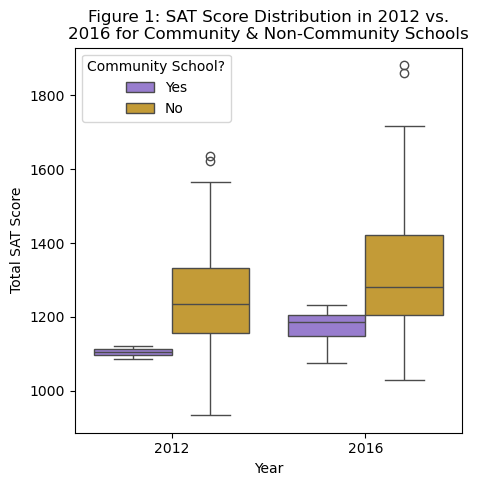

In [152]:
df_melted = merged_sat_scores_cs.melt(id_vars=['School ID', 'Community School?'], 
                                      value_vars=['Average Total SAT Score 2012', 'Average Total SAT Score 2016'], 
                                      var_name='Year', 
                                      value_name='Total SAT Score')

# Rename the values in 'Year' column
df_melted['Year'] = df_melted['Year'].replace({
    'Average Total SAT Score 2012': '2012',
    'Average Total SAT Score 2016': '2016'
})

# Create the box plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Year', y='Total SAT Score', hue='Community School?', data=df_melted, 
            palette={'Yes': 'mediumpurple', 'No': 'goldenrod'})

plt.xlabel("Year")
plt.ylabel("Total SAT Score")
plt.title("Figure 1: SAT Score Distribution in 2012 vs.\n2016 for Community & Non-Community Schools")

# Show plot
plt.show()

As observed in **Figure 1**, Community School's SAT Scores have improved significantly from 2012 to 2016, before and after they became Community Schools. Around 50% of the schools are scoring more than 1200, whereas in 2012, before the policy, all of them were scoring less than 1170. Therefore the initiative is resulting in a better performances for these schools, however there is still work that needs to be done to bridge the gap between Community and Non-Community Schools, which still have a much higher median. The following sections will explore academic, socioeconomic and race indicators in shaping SAT Score differences in 2016, to suggest improvements for the policy.

### 1.4.1. Academic Indicators: SAT Scores, Math and ELA Proficiency, Absence Rates.

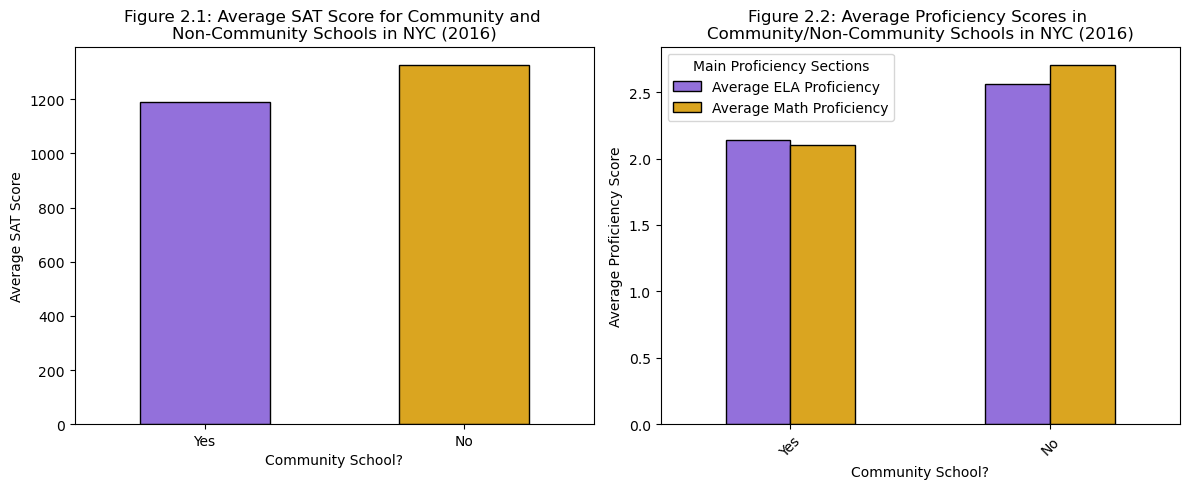

In [156]:
# First Plot: Average SAT Score for Community and Non-Community Schools
filtered_data_1 = merged_data_2016.filter(['Average Total SAT Score', 'Community School?'])
filtered_data_1 = filtered_data_1.dropna()
filtered_data_1 = filtered_data_1.groupby('Community School?')['Average Total SAT Score'].mean()

# Second Plot: Average Proficiency Scores in Community/Non-Community Schools
filtered_data_2 = demographics_2016.groupby('Community School?')[['Average ELA Proficiency', 'Average Math Proficiency']].mean()

# Reorder the index to Yes/No
filtered_data_1 = filtered_data_1.reindex(['Yes', 'No'])
filtered_data_2 = filtered_data_2.reindex(['Yes', 'No'])

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
filtered_data_1.plot(kind='bar', color=['mediumpurple', 'goldenrod'], edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Community School?')
axes[0].set_ylabel('Average SAT Score')
axes[0].set_title('Figure 2.1: Average SAT Score for Community and \nNon-Community Schools in NYC (2016)')
axes[0].tick_params(axis='x', rotation=0)

# Second subplot
filtered_data_2.plot(kind='bar', color=['mediumpurple', 'goldenrod'], edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Community School?')
axes[1].set_ylabel('Average Proficiency Score')
axes[1].set_title('Figure 2.2: Average Proficiency Scores in \nCommunity/Non-Community Schools in NYC (2016)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Main Proficiency Sections')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**Figures 2.1 and 2.2** show that Non-Community schools tend to perform better than Community Schools, in SAT Scores, Math and English Language Proficiency. Note that while the difference in average SAT Scores between the two groups is not too much (less than 200 points), the difference in Proficiency Scores is a bit higher, suggesting that Community Schools should receive not only SAT Exam support, but also basic Math and English programs to improve in these proficiency scores.

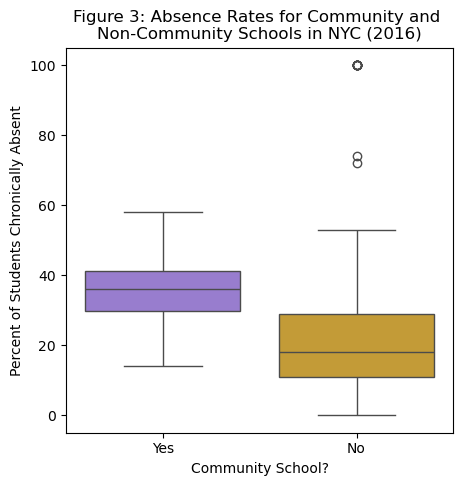

In [160]:
filtered_data = demographics_2016.filter(['Percent of Students Chronically Absent', 'Community School?']).dropna()

# Define a custom color palette
custom_palette = {"Yes": "mediumpurple", "No": "goldenrod"} 

# Create boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Community School?', y='Percent of Students Chronically Absent', 
            data=filtered_data, hue='Community School?', palette=custom_palette)

# Add labels and title
plt.xlabel("Community School?")
plt.ylabel("Percent of Students Chronically Absent")
plt.title("Figure 3: Absence Rates for Community and \nNon-Community Schools in NYC (2016)")

# Remove the legend (since hue duplicates x-axis labels)
plt.legend([],[], frameon=False)

# Show the plot
plt.show()

Aside from lower average SAT Scores, Community Schools tend to also have notoriously higher absence rates, ranging from 17 to 60% as shown in **Figure 3**. Although there’s some cases where Non-Community Schools exceed Community Schools’ absence rates, the majority of them have absence rates below 30% and some even have an absence rate of 0%, unlike Community Schools where the minimum is 17%.

### 1.4.2. Socioeconomic Factors: Economic Need Index and School Income Estimate.

Section 4.1. shows that the NYC Community Schools Initiative aimed to improve student outcomes by targeting schools with high absence rates and low SAT scores. However, it is essential to consider broader socioeconomic factors that may influence the academic indicators above (SAT Scores and Absence Rates). 


**Figure 4** examines the relationship between a school's Economic Need Index and its students' SAT scores, highlighting whether financial disadvantage correlates with lower academic performance. **Figure 5** explores the link between school income and economic need, distinguishing between community and non-community schools to assess whether financial disparities align with the designation of community schools.

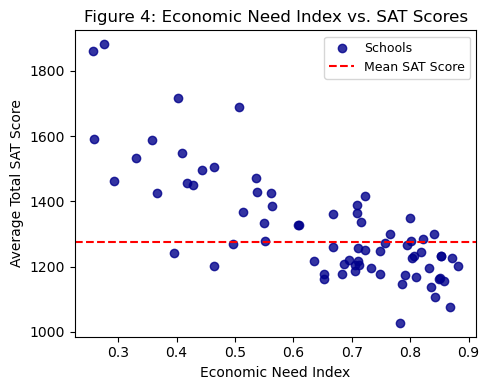

In [198]:
# Filter data
filtered_data = merged_data_2016.filter(['Average Total SAT Score', 'Economic Need Index'])

# Create a smaller figure
plt.figure(figsize=(5, 4))

# Scatter plot
plt.scatter(filtered_data['Economic Need Index'], 
            filtered_data['Average Total SAT Score'], 
            color='darkblue', alpha=0.8, label="Schools")

# Add a horizontal reference line at the mean SAT score
plt.axhline(y=filtered_data['Average Total SAT Score'].mean(), 
            color='red', linestyle='dashed', linewidth=1.5, label="Mean SAT Score")

# Add labels and title
plt.xlabel("Economic Need Index", fontsize=10)
plt.ylabel("Average Total SAT Score", fontsize=10)
plt.title("Figure 4: Economic Need Index vs. SAT Scores", fontsize=12)
plt.legend(fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

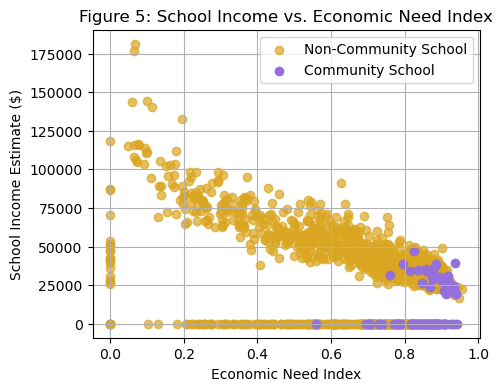

In [210]:
# Separate data into community and non-community schools
community_schools = demographics_2016[demographics_2016['Community School?'] == 'Yes']
non_community_schools = demographics_2016[demographics_2016['Community School?'] == 'No']

# Create scatter plot
plt.figure(figsize=(5,4))

plt.scatter(non_community_schools['Economic Need Index'], 
            non_community_schools['School Income Estimate'], 
            color='goldenrod', label='Non-Community School', alpha=0.7)

plt.scatter(community_schools['Economic Need Index'], 
            community_schools['School Income Estimate'], 
            color='mediumpurple', label='Community School', alpha=1)

# Add labels and title
plt.xlabel('Economic Need Index')
plt.ylabel('School Income Estimate ($)')
plt.title('Figure 5: School Income vs. Economic Need Index')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

The data reveals a negative correlation between Economic Need Index and SAT scores, as shown in **Figure 4**, suggesting that students in economically disadvantaged schools tend to score lower on the SAT. While community schools were designed to address such disparities, the persistently low scores indicate that additional resources may be needed to close the gap. We can also observe that students who score below average on the SAT, tend to have an Economic Need Index of at least 0.6, which coincides with the Economic Need Index for Community Schools in **Figure 5** (0.7 or more), indicating that these students perform below average in most cases.

**Figure 5** reinforces this point, showing that community schools (blue) tend to cluster at the highest levels of economic need while having significantly lower school income than non-community schools (red). Together, these findings suggest that while the Community Schools Initiative may have targeted the right schools, structural socioeconomic inequalities continue to play a critical role in shaping SAT performance. Addressing these disparities requires not only academic interventions but also broader socio economic reforms to ensure equitable access to quality education, like for example, ensuring all schools receive similar resources.

### 1.4.3. Differences by Race.

This section will dive into the racial composition of community versus non-community schools and the relationship between SAT performance and racial demographics.

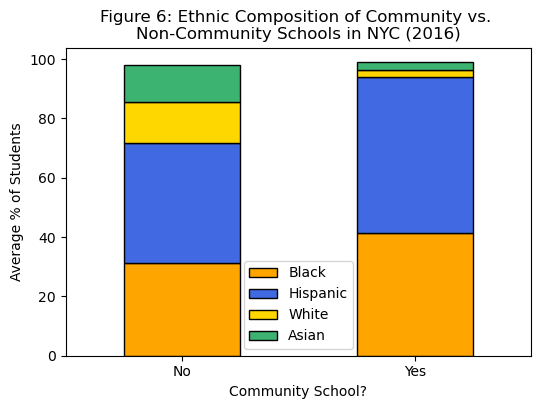

In [168]:
ethnicity_means = demographics_2016.groupby('Community School?')[['Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Asian']].mean()

# Plot stacked bar chart
ethnicity_means.plot(kind='bar', stacked=True, color=['orange', 'royalblue', 'gold', 'mediumseagreen'], edgecolor='black', figsize=(6,4))

# Add labels and title
plt.xlabel('Community School?')
plt.ylabel('Average % of Students')
plt.title('Figure 6: Ethnic Composition of Community vs. \nNon-Community Schools in NYC (2016)')
plt.legend(['Black', 'Hispanic', 'White', 'Asian'])
plt.xticks(rotation=0)

# Show the plot
plt.show()

Going back to Section 3, **Figure 6** confirms that Community schools serve a significantly higher proportion of Black and Hispanic students, while non-community schools have a greater percentage of White and Asian students. This suggests that the Community Schools Initiative targeted schools with predominantly minority populations, reinforcing the connection between race, economic need, and academic performance, as they also targeted high Economic Need students as shown in Figure 5. 

Given the earlier findings on economic disadvantages among community schools, this graph shows the intersection of socioeconomic and racial disparities in NYC’s education system, showing that Hispanic and Black students tend to have higher Economic Need Index, which might be the reason why they score lower in the SAT Scores, as they attend schools with lower School Income Estimate.

It is also important to note that in general, NYC schools have more Hispanics and Black students, which might be simply due to the demographics of New York overall, however, these students also tend to be in Community Schools more than White and Asian students.

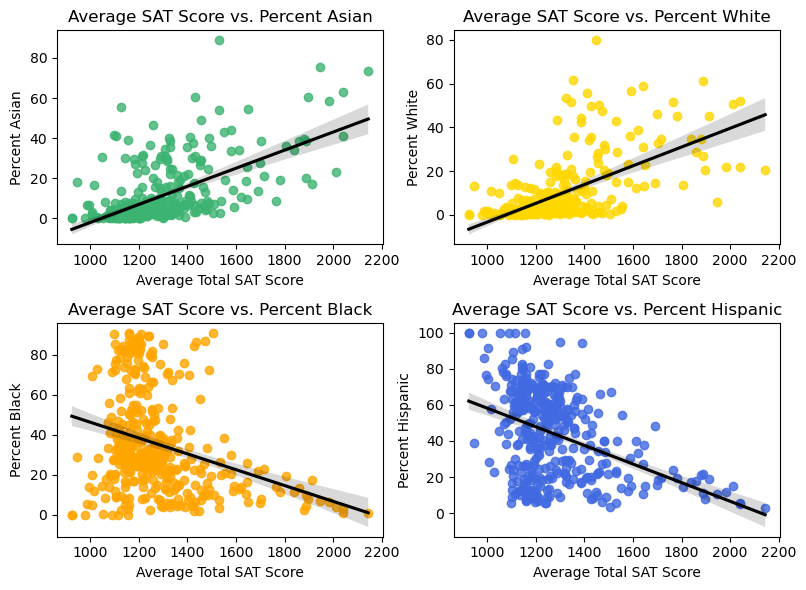

In [217]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # 2x2 layout

sns.regplot(x=scores_2016["Average Total SAT Score"], 
            y=scores_2016["Percent Asian"], 
            color='mediumseagreen', line_kws={"color": "black"}, ax=axes[0, 0])
axes[0, 0].set_title("Average SAT Score vs. Percent Asian")

sns.regplot(x=scores_2016["Average Total SAT Score"], 
            y=scores_2016["Percent White"], 
            color='gold', line_kws={"color": "black"}, ax=axes[0, 1])
axes[0, 1].set_title("Average SAT Score vs. Percent White")

sns.regplot(x=scores_2016["Average Total SAT Score"], 
            y=scores_2016["Percent Black"], 
            color='orange', line_kws={"color": "black"}, ax=axes[1, 0])
axes[1, 0].set_title("Average SAT Score vs. Percent Black")

sns.regplot(x=scores_2016["Average Total SAT Score"], 
            y=scores_2016["Percent Hispanic"], 
            color='royalblue', line_kws={"color": "black"}, ax=axes[1, 1])
axes[1, 1].set_title("Average SAT Score vs. Percent Hispanic")

plt.tight_layout()  # Adjusts spacing
plt.show()

SAT performance tends to vary by racial demographics, as shown above in **Figure 7**. The scatterplots display a negative correlation between SAT scores and the percentage of Black and Hispanic students, meaning that the more Hispanic and Black students in a school, the lower the average SAT Score. On the other hand, schools with a higher percentage of Asian and White students tend to have higher SAT scores. 

These results reinforce the idea that socioeconomic status—captured by the Economic Need Index—plays a significant role in shaping academic performance. Since community schools predominantly serve Black and Hispanic students and also students with higher Economic Need Index, we can conclude that these are the students that require the most assistance. Not only due to the high Economic Need Index but also because their lower SAT scores may affect their future opportunities and life quality.

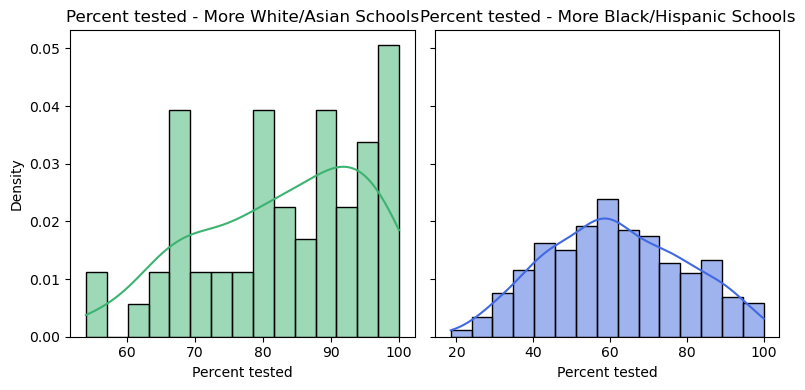

In [14]:
scores_2016['School Type'] = scores_2016.apply(lambda row: 
    'More Black/Hispanic' if (row['Percent Black'] + row['Percent Hispanic'] > row['Percent White'] + row['Percent Asian']) 
    else 'More White/Asian', axis=1)

# Filter dataset to remove missing values
filtered_data = scores_2016[['Percent Tested', 'School Type']].dropna()

# Create subplots for side-by-side density histograms
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Density Histogram for Schools with More White/Asian Students
sns.histplot(filtered_data[filtered_data['School Type'] == 'More White/Asian']['Percent Tested'], 
             bins=15, color='mediumseagreen', kde=True, stat='density', ax=axes[0])
axes[0].set_title("Percent tested - More White/Asian Schools")
axes[0].set_xlabel("Percent tested")

# Density Histogram for Schools with More Black/Hispanic Students
sns.histplot(filtered_data[filtered_data['School Type'] == 'More Black/Hispanic']['Percent Tested'], 
             bins=15, color='royalblue', kde=True, stat='density', ax=axes[1])
axes[1].set_title("Percent tested - More Black/Hispanic Schools")
axes[1].set_xlabel("Percent tested")

# Adjust layout
plt.tight_layout()
plt.show()

**Figure 8** displays the distribution of SAT participation rates in NYC schools, comparing those with higher percentages of White/Asian students to those with more Black/Hispanic students. Schools with predominantly White/Asian populations exhibit higher SAT testing rates, often clustering around 90–100%, suggesting stronger academic support systems, a more ingrained college-going culture, and better access to preparatory resources. 

In contrast, schools with more Black/Hispanic students show a wider distribution of participation, with many falling between 40–70%, reflecting potential barriers such as limited access to college counseling, discouragement to take the SAT, and socioeconomic challenges. These disparities highlight the uneven impact of NYC’s Community Schools Initiative, which, despite efforts to promote equity, appears to have had limited influence on closing gaps in SAT participation. 

# 2. Project Two

## 2.1. The Message

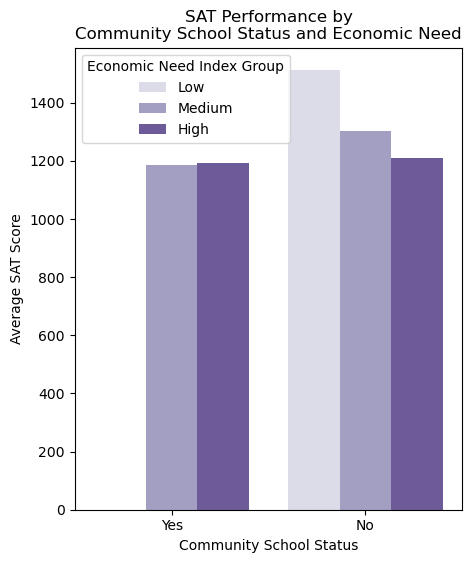

In [308]:
# Define fixed threshold-based Economic Need Index categories
conditions = [
    (merged_data_2016['Economic Need Index'] < 0.5),
    (merged_data_2016['Economic Need Index'] >= 0.5) & (merged_data_2016['Economic Need Index'] < 0.75),
    (merged_data_2016['Economic Need Index'] >= 0.75)
]
labels = ['Low', 'Medium', 'High']

merged_data_2016['ENI Group'] = pd.cut(merged_data_2016['Economic Need Index'], bins=[-float('inf'), 0.5, 0.75, float('inf')], labels=labels)

# Create the bar plot (fixed warning)
plt.figure(figsize=(5, 6))
sns.barplot(data=merged_data_2016, x='Community School?', y='Average Total SAT Score', 
            hue='ENI Group', errorbar=None, palette='Purples') 

# Labels and title
plt.xlabel('Community School Status')
plt.ylabel('Average SAT Score')
plt.title('SAT Performance by\nCommunity School Status and Economic Need')
plt.legend(title="Economic Need Index Group")

# Show plot
plt.show()

The increase in SAT scores for Community Schools from 2012 (pre-policy) to 2016 (post-policy) in **Figure 1** suggests a positive impact of the Community Schools initiative. Moreover, there are no Low Economic Need Index schools that are Community Schools, showing that the policy was radical in considering only those schools with Medium/High Economic Need to get assistance. Unfortunately, persistent score disparities based on Economic Need, indicate that further improvements are necessary to ensure the policy’s effectiveness in addressing educational inequities, considering that High Economic Need schools keep having the lowest performance and there are still many High Economic Need schools, that are not Community Schools yet.

## 2.2. Maps and Interpretations.

In [154]:
! pip install -q qeds fiona geopandas  gensim folium pyLDAvis descartes

In [156]:
import geopandas as gpd
import matplotlib.colors as mcolors
from shapely.geometry import Point
from matplotlib import markers
from geopandas.datasets import get_path

import plotly.graph_objects as go
from plotly.offline import iplot

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

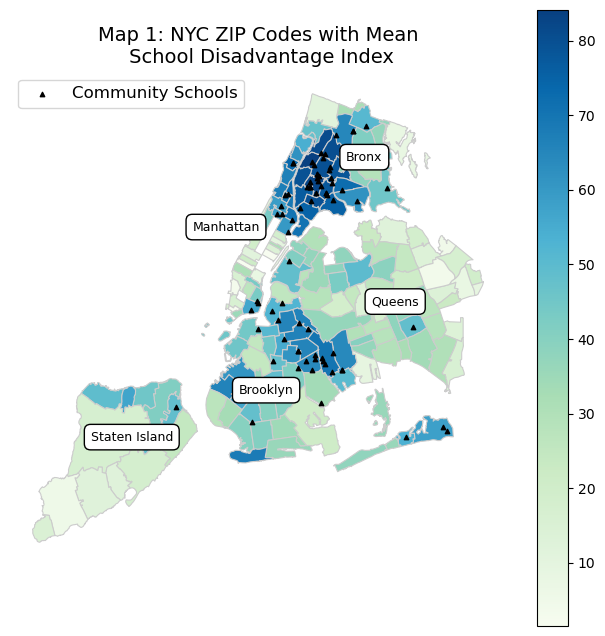

In [282]:
# Load demographics data and filter for relevant columns
df_disadvantage = demographics_2016.filter(['Community School?', 'Latitude', 'Longitude', 'School Disadvantage Index', 'Zip'])
df_mean_disadvantage = df_disadvantage.groupby('Zip')['School Disadvantage Index'].mean().reset_index()
geojson_file = 'nyc-zip-code-tabulation-areas-polygons.geojson'
gdf = gpd.read_file(geojson_file)
gdf = gdf.rename(columns={'postalCode': 'Zip'})
gdf['Zip'] = gdf['Zip'].astype(str)
df_mean_disadvantage['Zip'] = df_mean_disadvantage['Zip'].astype(str)
gdf_merged = gdf.merge(df_mean_disadvantage, on='Zip', how='left')

# Filter out community schools from the demographics dataset
community_schools = df_disadvantage[df_disadvantage['Community School?'] == 'Yes']

# Load NYC borough boundaries and reproject to match the school data
nyc_map = gpd.read_file(get_path('nybb'))  # Ensure this loads the correct NYC borough map
nyc_map = nyc_map.to_crs(epsg=4326)  # Convert to Latitude/Longitude CRS

# Create the plot for the map
fig, ax = plt.subplots(figsize=(8, 8))
gdf_merged.plot(column='School Disadvantage Index', cmap='GnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
community_schools_plot = ax.scatter(
    community_schools['Longitude'], community_schools['Latitude'], 
    marker=markers.MarkerStyle("^"),  # Triangle marker
    color='black',  # Color of the triangles
    s=10,  # Size of the triangle markers
    label='Community Schools'
)

# Manually adjust label positions for each borough
for idx, row in nyc_map.iterrows():
    # Get the centroid of each borough polygon
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y

    # Adjust the position manually for each borough (offset_x and offset_y)
    if row['BoroName'] == 'Manhattan':
        offset_x, offset_y = -0.05, 0.01
    elif row['BoroName'] == 'Brooklyn':
        offset_x, offset_y = -0.02, -0.01
    elif row['BoroName'] == 'Queens':
        offset_x, offset_y = 0.01, 0.01
    elif row['BoroName'] == 'Bronx':
        offset_x, offset_y = 0.02, 0
    elif row['BoroName'] == 'Staten Island':
        offset_x, offset_y = 0.02, 0.01
    else:
        offset_x, offset_y = 0.01, 0.01

    # Add the borough name with a rectangle background for readability
    ax.text(
        x + offset_x, y + offset_y, row['BoroName'], 
        fontsize=9, ha='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  # Rectangle behind the text
    )

# Add a title and format the plot
plt.title("Map 1: NYC ZIP Codes with Mean\n School Disadvantage Index", fontsize=14)
plt.axis('off')  # Turn off axis for cleaner visualization
plt.legend(loc='upper left', fontsize=12)

plt.show()

**Map 1** reveals critical patterns in the Bronx and Brooklyn, highlighting areas where the School Disadvantage Index is particularly high, indicating neighborhoods with significant economic need and lower school income levels. These areas are marked with intense red color, signaling the greatest disparities in economic resources compared to Staten Island and North Queens. Interestingly, these high-need areas align with the locations where Community Schools were strategically implemented, marked with triangles. This reinforces the idea that areas facing the most educational challenges were prioritized for the introduction of community schools, which aim to bridge gaps in support and funding for underprivileged schools.

This connection between economic disadvantage and the establishment of community schools sets the stage for further analysis in **Map 2**, where we will explore the correlation between these same high-need regions and their performance on the SAT.

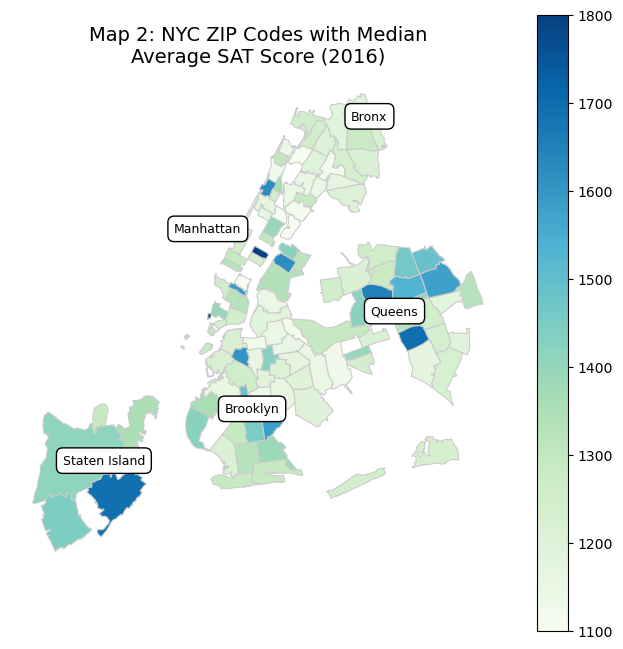

In [280]:
df_economic_need = scores_2016.filter(['Latitude', 'Longitude', 'Average Total SAT Score', 'Zip Code'])
df_mean_economic_need = df_economic_need.groupby('Zip Code')['Average Total SAT Score'].median().reset_index()
geojson_file = 'nyc-zip-code-tabulation-areas-polygons.geojson'
gdf = gpd.read_file(geojson_file)
gdf = gdf.rename(columns={'postalCode': 'Zip Code'})
gdf['Zip Code'] = gdf['Zip Code'].astype(str)
df_mean_economic_need['Zip Code'] = df_mean_economic_need['Zip Code'].astype(str)

# Merge the GeoDataFrame with the SAT score data
gdf_merged = gdf.merge(df_mean_economic_need, on='Zip Code', how='left')
# Load NYC borough boundaries and reproject to match the school data
nyc_map = gpd.read_file(get_path('nybb'))  # Ensure this loads the correct NYC borough map
nyc_map = nyc_map.to_crs(epsg=4326)  # Convert to Latitude/Longitude CRS
# Create the plot for the map
fig, ax = plt.subplots(figsize=(8, 8))
gdf_merged.plot(
    column='Average Total SAT Score', 
    cmap='GnBu', 
    linewidth=0.8, 
    ax=ax, 
    edgecolor='0.8', 
    legend=True, 
    vmin=1100, vmax=1800  # Set SAT score range from 800 to 1800
)
for idx, row in nyc_map.iterrows():
    # Get the centroid of each borough polygon
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y

    # Adjust the position manually for each borough (offset_x and offset_y)
    if row['BoroName'] == 'Manhattan':
        offset_x, offset_y = -0.05, 0.01
    elif row['BoroName'] == 'Brooklyn':
        offset_x, offset_y = -0.02, -0.01
    elif row['BoroName'] == 'Queens':
        offset_x, offset_y = 0.01, 0.01
    elif row['BoroName'] == 'Bronx':
        offset_x, offset_y = 0.03, 0.03
    elif row['BoroName'] == 'Staten Island':
        offset_x, offset_y = 0.02, 0.01
    else:
        offset_x, offset_y = 0.01, 0.01

    # Add the borough name with a rectangle background for readability
    ax.text(
        x + offset_x, y + offset_y, row['BoroName'], 
        fontsize=9, ha='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )
plt.title("Map 2: NYC ZIP Codes with Median\nAverage SAT Score (2016)", fontsize=14)
plt.axis('off')  # Turn off axis for cleaner visualization

plt.show()

**Map 2** displays an opposite pattern in color, revealing a critical insight: the areas with the highest School Disadvantage Index in **Map 1**, particularly in the Bronx and Brooklyn, also show the lowest SAT scores. This pattern confirms that Community Schools were strategically placed in areas of greatest need. However, the data also highlights a significant performance gap across all schools, not only Community Schools. As observed in **Map 2**, only a small number of schools across New York achieve an average SAT score above 1400. In fact, fewer than 10 zip codes even exceed a score of 1600, pointing to the ongoing academic challenges faced by schools in most New York City areas. For example, schools in South Queens, which have a low School Disadvantage Index, are underperforming on the SAT. This suggests that SAT performance is not solely driven by socioeconomic factors, and that there are additional barriers to success. 

To overcome these obstacles, efforts to improve SAT scores must extend beyond the most disadvantaged neighborhoods. For example, schools across the entire city, specially in Queens and upper Manhattan (aside from Community Schools), could benefit from school-specific SAT preparation programs tailored to their unique needs. Promoting a college-going culture could also be useful to motivate the students to make an effort on the test. Focusing back on areas with Community Schools, the map makes it clear that they still need further support to raise their average SAT scores and narrow the performance gap relative to other schools.

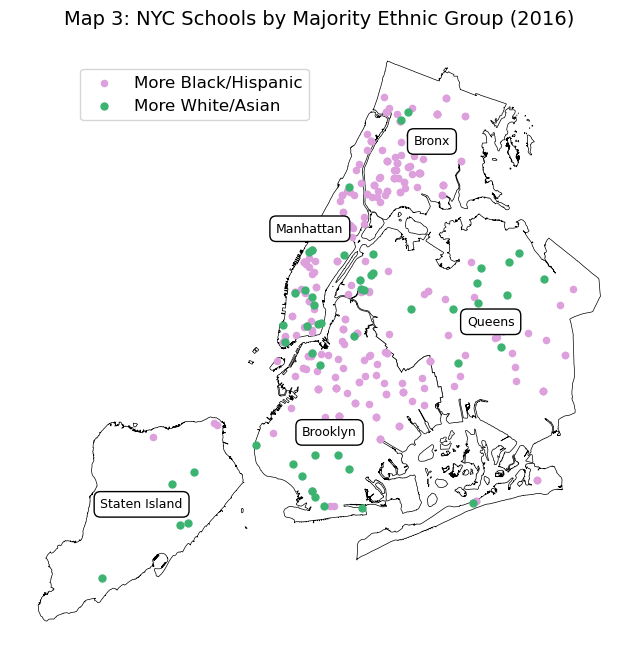

In [296]:
# Create latitude and longitude for geometry points
scores_2016["Coordinates"] = list(zip(scores_2016['Longitude'], scores_2016['Latitude']))
scores_2016["Coordinates"] = scores_2016["Coordinates"].apply(Point)

# Convert to GeoDataFrame and set CRS (EPSG:4326 is for Latitude/Longitude)
gdf = gpd.GeoDataFrame(scores_2016, geometry="Coordinates", crs="EPSG:4326")
nyc_map = gpd.read_file(get_path('nybb'))
nyc_map = nyc_map.to_crs(epsg=4326)  # Convert borough map to the same CRS
fig, ax = plt.subplots(figsize=(8, 8))
nyc_map.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

# Create the 'School Type' variable based on majority ethnicity
def classify_school(row):
    if row['Percent Black'] + row['Percent Hispanic'] > row['Percent White'] + row['Percent Asian']:
        return 'More Black/Hispanic'
    else:
        return 'More White/Asian'

scores_2016['School Type'] = scores_2016.apply(classify_school, axis=1)

# Plot schools based on the 'School Type'
black_hispanic_schools = gdf[gdf['School Type'] == 'More Black/Hispanic']
white_asian_schools = gdf[gdf['School Type'] == 'More White/Asian']

black_hispanic_schools.plot(ax=ax, color='plum', markersize=20, label='More Black/Hispanic')
white_asian_schools.plot(ax=ax, color='mediumseagreen', markersize=25, label='More White/Asian')

# Manually adjust label positions for each borough
for idx, row in nyc_map.iterrows():
    # Get the centroid of each borough polygon
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y
    if row['BoroName'] == 'Manhattan':
        offset_x, offset_y = -0.02, 0.01
    elif row['BoroName'] == 'Brooklyn':
        offset_x, offset_y = -0.02, -0.01
    elif row['BoroName'] == 'Queens':
        offset_x, offset_y = 0.01, 0.01
    elif row['BoroName'] == 'Bronx':
        offset_x, offset_y = 0, 0
    elif row['BoroName'] == 'Staten Island':
        offset_x, offset_y = 0, 0
    else:
        offset_x, offset_y = 0.01, 0.01
    ax.text(
        x + offset_x, y + offset_y, row['BoroName'], 
        fontsize=9, ha='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  # Rectangle behind the text
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis("off")
plt.title("Map 3: NYC Schools by Majority Ethnic Group (2016)", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(0.1, 0.9), fontsize=12)
plt.show()

This racial distribution displayed in **Map 3** underscores a key dimension of NYC’s educational inequities: students in majority Black and Hispanic schools are more likely to face both economic disadvantages and lower SAT performance. While **Map 1** showed that Community Schools were strategically placed in high-need areas, and **Map 2** confirmed the persistent SAT gap in those same regions, **Map 3** suggests that racial disparities remain a significant factor in educational outcomes.

These findings directly connect to the central question of this research: Has the Community Schools Initiative effectively addressed educational disparities, or do significant gaps still persist? Although prioritizing high-need areas was achieved succesfully by denoting Community Schools, this map highlights the need for further intervention beyond economic support alone, as the score differences aren't only due to socioeconomic factors represented by the School Disadvantage Index. Instead, racial disparities also present a strong relation in academic outcomes, and if they persist to affect SAT performance despite current efforts, the initiative may require additional academic resources, specially for students of Hispanic and Black race.

By analyzing these three maps together, we see that NYC’s Community Schools Initiative has made strides in targeting disadvantaged areas, however deeper structural inequities—economic and racial—still play a critical role in shaping academic outcomes. To fully close the SAT performance gap, future efforts must not only address socioeconomic challenges but also confront the racial disparities that persist in the city’s education system.

## 2.3. Regressions.

In [35]:
!pip install -q linearmodels
!pip install stargazer

In [37]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from IPython.display import HTML

In this section, we run linear regressions to examine the relationship between socioeconomic and racial factors and average total SAT scores in New York schools by taking a more numerical approach. Each independent variable was chosen based on existing literature on educational inequality and the results we have obtained from previous graphs.

For **Regression 1** we will be using **Economic Need Index**, **School Income Estimate** and **Racial Composition** to explain differences in **Total SAT Score**. Previous research suggests that students from higher-income backgrounds tend to score higher on standardized tests (Hess, 2019) due to better access to educational resources, tutoring, and other advantages. This will be captured by the Economic Need Index (and School Disadvantage Index in **Regression 2**) which capture economic hardship at the school level. The School Income Estimate variable represents the estimated average income of students' families, which theoretically correlates with better educational opportunities, leading to higher SAT scores (Hess, 2019). Moreover, studies show that the income gap is wider for Black students than for White students (Dixon-Roman, Everson, & Mcardle, 2013), making it important to explore whether racial disparities persist even when controlling for economic factors in New York City schools. We will use racial composition (Majority Black, Majority Hispanic, Majority White and control with Majority Asian), to measure racial disparities in SAT performance, while considering other socioeconomic factors. 

For **Regression 2** we use results obtained from previous sections, to obsere the effects of different variables on SAT Score. **Section 1** showed an interesting insight about **Percent Tested** which represents the proportion of students in a school taking the SAT, and was very different for Majority White/Asian and Majority Black/Hispanic schools. We will use it in Regression 2 to observe whether this factor shapes SAT Score differences across schools. Aditionally, we consider whether **Absence Rates** can impact performance; I currently believe higher absenteeism might suggest disengagement from school, which can negatively affect SAT scores, but we will test this using our regression. Lastly, we include **School Disadvantage Index**, to account for socioeconomic factors (School income estimate and Economic need index) in the form of percentiles; as variables created in Section 1.2.2.

For the analysis, we assume a linear relationship between SAT scores and the independent variables: Economic Need Index, School Income Estimate, and Racial Composition. This assumption is mainly supported by patterns observed in the data and previous literature. The Economic Need Index shows a negative linear trend with SAT scores, as suggested by Figure 5. Conversely, higher school income estimates correlate positively with SAT scores (Dixon-Roman, Everson, & Mcardle, 2013). Racial composition also shows relatively linear associations with SAT scores in Figure 7, reflecting systemic socioeconomic disparities rather than nonlinear effects. Overall, the relationships appear steady and proportional, making a linear model a reasonable choice.

In [39]:
merged_data_2016.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN in relevant columns
cols_to_keep = ['Economic Need Index', 'School Income Estimate', 
                'Average Total SAT Score', 'Percent Black', 'Percent Hispanic', 
                'Percent White', 'Percent Asian']
merged_data_2016 = merged_data_2016.dropna(subset=cols_to_keep)

# Create Majority group dummies (assigns 1 if above 50%, 0 otherwise)
merged_data_2016['Majority_Black'] = (merged_data_2016['Percent Black'] > 50).astype(int)
merged_data_2016['Majority_Hispanic'] = (merged_data_2016['Percent Hispanic'] > 50).astype(int)
merged_data_2016['Majority_White'] = (merged_data_2016['Percent White'] > 50).astype(int)
merged_data_2016['Majority_Asian'] = (merged_data_2016['Percent Asian'] > 50).astype(int)  # Will drop this later

# Set 'Majority_Asian' as baseline by dropping it from the regression
X1 = sm.add_constant(merged_data_2016[['Economic Need Index']])
X2 = sm.add_constant(merged_data_2016[['Economic Need Index', 'School Income Estimate']])
X3 = sm.add_constant(merged_data_2016[['Economic Need Index', 'School Income Estimate', 'Majority_Black', 'Majority_Hispanic']])
X4 = sm.add_constant(merged_data_2016[['Economic Need Index', 'School Income Estimate', 
                                       'Majority_Black', 'Majority_Hispanic', 
                                       'Majority_White']])  # Majority_Asian omitted as baseline

y = merged_data_2016['Average Total SAT Score']

# Run regressions
model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()
model3 = sm.OLS(y, X3).fit()
model4 = sm.OLS(y, X4).fit()

# Format results in a table using Stargazer
stargazer = Stargazer([model1, model2, model3, model4])
stargazer.custom_columns(["Model 1: Need Index", "Model 2: +Income", "Model 3", "Model 4"], [1, 1, 1, 1])
stargazer.covariate_order([
    'const', 'Economic Need Index', 'School Income Estimate', 
    'Majority_Black', 'Majority_Hispanic', 'Majority_White'
])
stargazer.rename_covariates({
    'const': 'Intercept',
    'Economic Need Index': 'Economic Need Index',
    'School Income Estimate': 'School Income Estimate',
    'Majority_Black': 'Majority Black',
    'Majority_Hispanic': 'Majority Hispanic',
    'Majority_White': 'Majority White',
})

display(HTML(stargazer.render_html()))

The results from this **Regression 1** confirm a strong link between economic disadvantage and lower SAT scores. The Economic Need Index is consistently negative and statistically significant, reinforcing that schools with higher economic need tend to have lower SAT performance; if Economic Need Index goes up by 1 points, SAT Score goes down by about -740 points, which is very worrying. Another significant result is that, even after controlling for economic factors, majority Black schools score significantly lower—by approximately 79 to 90 points—suggesting that racial disparities in SAT performance extend beyond economic disadvantage. Surprisingly, majority Hispanic schools do not show a statistically significant difference in SAT scores, implying that the economic need variable captures most of the disadvantage faced by Hispanic students. Finally, the School Income Estimate appears to be non-significant, meaning that a school’s average family income does not directly predict SAT scores once economic need is accounted for. Although this is what the data suggests, I believe the results would vary if we changes School Income Estimate to have different units, as of right now it is in dollars, and logically, a 1-dollar increase wouldn't significantly increase SAT Score.

In short, the findings suggest that while economic disadvantage plays a key role in SAT performance, racial disparities persist, particularly for Black students, pointing to structural inequities that require targeted intervention beyond economic support alone.

In [41]:
# Remove infinite values and drop NaNs
merged_new_variable.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_new_variable.dropna(subset=['Average Total SAT Score', 'School Disadvantage Index', 
                                   'Percent Tested', 'Percent of Students Chronically Absent'], inplace=True)

# Define the dependent variable
y = merged_new_variable['Average Total SAT Score']

# Define independent variables for different models
X1 = sm.add_constant(merged_new_variable[['School Disadvantage Index']])
X2 = sm.add_constant(merged_new_variable[['School Disadvantage Index', 'Percent Tested']])
X3 = sm.add_constant(merged_new_variable[['School Disadvantage Index', 'Percent Tested', 'Percent of Students Chronically Absent']])
X4 = sm.add_constant(merged_new_variable[['School Disadvantage Index', 'Percent Tested', 'Percent of Students Chronically Absent']])

# Fit regression models
model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()
model3 = sm.OLS(y, X3).fit()
model4 = sm.OLS(y, X4).fit()

# Format results in Stargazer table
stargazer = Stargazer([model1, model2, model3, model4])
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4"], [1, 1, 1, 1])

# Set covariate order and rename variables for clarity
stargazer.covariate_order([
    'const', 'School Disadvantage Index', 'Percent Tested', 'Percent of Students Chronically Absent'
])
stargazer.rename_covariates({
    'const': 'Intercept',
    'School Disadvantage Index': 'School Disadvantage Index',
    'Percent Tested': 'Percent Tested',
    'Percent of Students Chronically Absent': 'Chronically Absent (%)',
})

# Display table
display(HTML(stargazer.render_html()))

In **Regression 2** we observe that the School Disadvantage Index remains negative and significant, reinforcing the strong association between economic hardship and lower SAT performance. Notably, Percent Tested is positive and significant, meaning that schools with a higher percentage of students taking the SAT tend to have higher average scores. This could indicate that schools actively encouraging broader participation may also provide better test preparation resources, leading to stronger performance. Surprisingly, Chronic Absenteeism is not significant, suggesting that while attendance issues may impact individual student outcomes, they do not strongly predict overall school-wide SAT averages. This raises important questions about the mechanisms driving performance disparities—while economic hardship is clearly a major factor, improving test participation and preparation strategies at the school level could be an effective way to boost SAT scores across disadvantaged schools.

### 2.3.1. Preferred Specification

$$
SAT\_Score = 1865.773 - 814.159 (ENI) - 90.479 (Majority\_Black)
$$

As preferred specification, Model 4 was selected because it provides the most comprehensive explanation of SAT score disparities by incorporating both economic and racial factors. The **Economic Need Index (ENI)** remains strongly significant, reinforcing the crucial role of economic hardship in shaping SAT performance. At the same time, the **Majority Black** variable is also significant, confirming that racial disparities persist even after controlling for economic need. Additionally, this model has the highest adjusted R squared (0.76) among all specifications, meaning it explains the most variance in SAT scores. 

Interestingly, the Majority White coefficient is comparable in magnitude to the Majority Black coefficient, suggesting that racial composition plays a broader role in SAT outcomes across different groups, however since it is non-significant, as well as School Income Estimate, it will not be included in the preferred specification. Including school-level income in the equation could be redundant as it might be highly correlated with Economic Need Index.

Overall, Model 4 strikes the best balance between explanatory power and interpretability, making it the most suitable for understanding the structural inequalities affecting SAT performance in NYC schools.

# 3. Final Project

## 3.1. Potential Data to Scrape

For this project, I plan to use the **SchoolDigger API** to obtain additional data on NYC schools. The API provides school rankings, the percentage of students receiving free or reduced lunch and student-teacher ratio, which can be valuable indicators for my analysis. By using more specific variables, for example “Percent of Lunch Recipients” instead of  “School Income Estimate”, it might be possible to offer more specific recommendations for NYC schools to improve their quality. The student-teacher ratio can help see if certain schools need to increase their number of teachers to provide a better service, and possibly improve academic outcomes for example, SAT Scores.

The data will be obtained from the SchoolDigger website via its API (Address: https://rapidapi.com/schooldigger-schooldigger-default/api/schooldigger-k-12-school-data-api ), which allows access to information on various schools across different districts in New York City and importantly, on different time periods. Specifically, I will scrape the percentage of students receiving free or reduced lunch, student-teacher ratios, and district details. This data will provide a more comprehensive understanding of how socioeconomic factors correlate with school performance.

To merge this data with my existing dataset, I will match schools by their name. The percentage of lunch recipients will be directly compared with the Economic Need Index from my dataset to assess how well the two measures align. Additionally, school rankings will be analyzed to determine whether community schools perform better or worse than non-community schools in overall standings. These new variables will help strengthen my analysis by providing insights into the broader impact of economic disparities on school performance.

## 3.2. Potential Challenges

Despite the usefulness of the SchoolDigger API, several challenges arise when using it for data collection. One significant limitation is the restricted number of API calls per day (10 calls per day). Since the API allows only a limited number of requests, I may need to collect the data gradually over multiple days or explore the possibility of requesting a higher limit, for which I would have to pay. Additionally, there is data for only a few schools available through the API, which could lead to a smaller sample size and therefore less reliable results. This could also make it difficult to merge the web scraped data with my original data set, as there will be lots of missing values for most schools in my original data set.

Another major challenge is that the API only provides data for 2024, with no historical records available (at least in the free version). Since my research focuses on assessing changes over time, in 2012 and 2016, the absence of past school rankings and economic indicators could make it difficult to measure progress before and after the implementation of the Community Schools Initiative. To address this, I may need to supplement my dataset with alternative sources that provide historical school performance data. Lastly, there may be inconsistencies in school names or IDs between the SchoolDigger API and my dataset. This could require additional data cleaning and manual verification to ensure accurate merging. 

Despite the challenges, we will scrape as much data as possible and obtain informative visualizations by subsetting by Community/Non-Community School or by borough, depending on how much data we’re able to collect.	

## 3.3. Scraping Data from a Website

In [17]:
import requests
import json
from bs4 import BeautifulSoup

In [107]:
import requests

url = "https://schooldigger-k-12-school-data-api.p.rapidapi.com/v2.0/rankings/schools/NY"

headers = {
    "x-rapidapi-key": "d512a096f4msha173328b64bde72p16487fjsncf582f7cfeb8",  # Replace with your actual API key
    "x-rapidapi-host": "schooldigger-k-12-school-data-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(f"Status Code: {response.status_code}")

Status Code: 200


In [189]:
# Check the API response
# print(response.json())

# Print formatted JSON response to analyze structure
# print(json.dumps(response.json(), indent=4))

data = response.json()

# Extract school list
schools = data.get("schoolList", [])

# Extract relevant fields
school_data = []
for school in schools:
    details = {
        "School ID": school.get("schoolid"),
        "School Name": school.get("schoolName"),
        "Phone": school.get("phone"),
        "Street": school["address"].get("street", ""),
        "City": school["address"].get("city", ""),
        "Zip Code": school["address"].get("zip", ""),
        "District": school["district"].get("districtName", ""),
        "County": school["county"].get("countyName", ""),
        "Number of Students (2024)": school["schoolYearlyDetails"][0].get("numberOfStudents") if school.get("schoolYearlyDetails") else None,
        "Percent Free/Disc Lunch (2024)": school["schoolYearlyDetails"][0].get("percentFreeDiscLunch") if school.get("schoolYearlyDetails") else None,
        "Pupil-Teacher Ratio (2024)": school["schoolYearlyDetails"][0].get("pupilTeacherRatio") if school.get("schoolYearlyDetails") else None
    }
    school_data.append(details)

# Create DataFrame
webscraped_1 = pd.DataFrame(school_data)

# Display first few rows
webscraped_1.head(4)

# Data was saved to CSV to re-use in the future, in case the API calls aren't enough.
# webscraped_1.to_csv('webscraped_data.csv', index=False)

,School ID,School Name,Phone,Street,City,Zip Code,District,County,Number of Students (2024),Percent Free/Disc Lunch (2024),Pupil-Teacher Ratio (2024)
0,360007806115,Special Music School,(212) 501-3318,129 W 67th St,New York,10023,New York City Geographic District # 3,New York County,299,26.09,10.4
1,360007604873,New Explorations Into Sciencetech And Math Hig...,(212) 677-5190,111 Columbia St,New York,10002,New York City Geographic District # 1,New York County,1613,25.98,16.6
2,360007805773,Anderson School (The),(212) 595-7193,100 W 77th St,New York,10024,New York City Geographic District # 3,New York County,510,10.20,17.5
3,360007703548,Ps 77 Lower Lab School,(212) 427-2798,1700 3rd Ave,New York,10128,New York City Geographic District # 2,New York County,368,9.51,19.3


The data was extracted succesfully from the School Digger API, however there's a few issues with it. Although there's valuable information, it is only possible to extract information for 10 schools, which will lead to unreliable conclusions as we'll only observe a very small subset of the bigger picture. Nevertheless, the web scraping process was achieved succesfully.

### 3.3.1. Second data scrapping attempt

The next section extracts another set of data, this time from a NYC Webpage (https://divinemoving.com/risky-nyc-neighborhoods-to-steer-clear-from/), with the most dangerous neighbourhoods in NYC in 2016, just to get a snapshot of other variables possibly affecting students' performance in the time period we're studying (2016). Note that this process used Text Analysis to extract data from a website. This data will be used to assess whether these neighbourhoods have more Community Schools.

In [73]:
import re

In [22]:
url = "https://divinemoving.com/risky-nyc-neighborhoods-to-steer-clear-from/"
response = requests.get(url)

# Step 1: Check website for 200 response.
print(f"Status Code: {response.status_code}")

Status Code: 200


In [52]:
# Step 2: Use BeautifulSoup on HTML Content
soup = BeautifulSoup(response.text, "html.parser")

# Step 3: Extract neighborhoods and descriptions
neighborhoods = []
for h2 in soup.find_all("h2"):
    name = h2.get_text(strip=True)
    description_tag = h2.find_next_sibling("p")
    description = description_tag.get_text(strip=True) if description_tag else "No description available"

    # Filter out irrelevant entries
    if len(description.split()) > 5:  # Keep only meaningful descriptions
        neighborhoods.append({"Neighborhood": name, "Description": description})

# Step 4: Convert to Pandas DataFrame
webscraped_2 = pd.DataFrame(neighborhoods)

# Remove title entry
webscraped_2 = webscraped_2.iloc[1:].reset_index(drop=True)

# Step 5: Display the cleaned DataFrame
webscraped_2.head(3)

,Neighborhood,Description
0,"Brooklyn Heights, Boerum Hill, and Dumbo are t...",There are a few select neighborhoods in New Yo...
1,Chelsea and Hell’s Kitchen,The name itself is a sale of its history. Hell...
2,Bedford-Stuyvesant,You may have heard of its nickname “Do or Die”...


The names of the neighbourhoods here are are all within more text, so we will use Text Analysis to extract them.

In [193]:
# Function to clean and split neighborhoods
def split_neighborhoods_regex(df):
    cleaned_rows = []
    for _, row in df.iterrows():
        neighborhoods = row["Neighborhood"].strip()
        description = row["Description"]

        # Extract valid neighborhoods using regex (capitalized words like 'Dumbo', 'Chelsea', etc.)
        matches = re.findall(r'\b(?:[A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\b', neighborhoods)

        # Special Case: Fix 'Hell' -> 'Hell's Kitchen'
        cleaned_neighborhoods = ["Hell's Kitchen" if n == "Hell" else n for n in matches]

        # Append each cleaned neighborhood as a separate row
        for n in cleaned_neighborhoods:
            cleaned_rows.append({"Neighborhood": n.strip(), "Description": description})

    return pd.DataFrame(cleaned_rows)

# Apply cleaning function
df_cleaned = split_neighborhoods_regex(webscraped_2)

# Remove last two rows containing unnecessary information.
df_cleaned = df_cleaned.iloc[:-2]

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Manually add zip codes.
zip_codes = ['11201', '11201', '10016', '10001', '10018', '10036', '10506', '12173', '10004', '11201',
             '11205', '10003', '10010', '13615', '10454', '12834', '10014', '10019', '10453', '10026', '10301']

# Add the 'Zip Code' column to df_cleaned
df_cleaned['Zip Code'] = zip_codes

# Display cleaned DataFrame
df_cleaned.head(5)

,Neighborhood,Description,Zip Code
0,Brooklyn Heights,There are a few select neighborhoods in New Yo...,11201
1,Boerum Hill,There are a few select neighborhoods in New Yo...,11201
2,Dumbo,There are a few select neighborhoods in New Yo...,10016
3,Chelsea,The name itself is a sale of its history. Hell...,10001
4,Hell's Kitchen,The name itself is a sale of its history. Hell...,10018


This data set is a bit larger, with 20 observations containing the most dangerous neighbourhoods in NYC in 2016, according to Divine Moving, a NYC based company.

## 3.4. Visualizing the Scraped Dataset

### 3.4.1. Means of Percent of Free/Discounted Lunch Recipients and Pupil-Teacher Ratio per Borough for a sample of 10 schools.

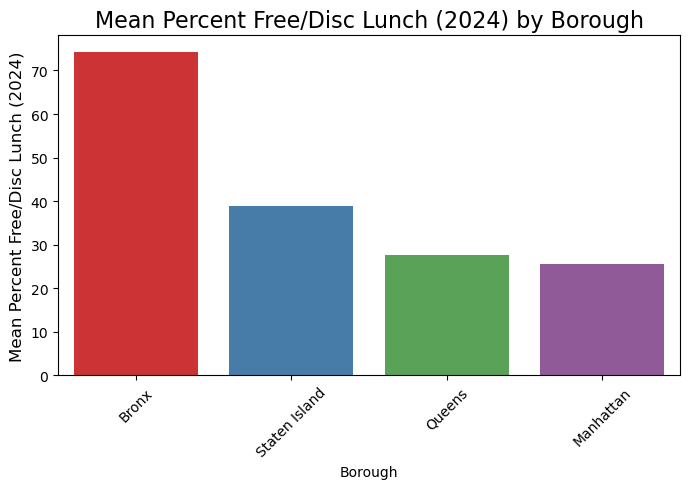

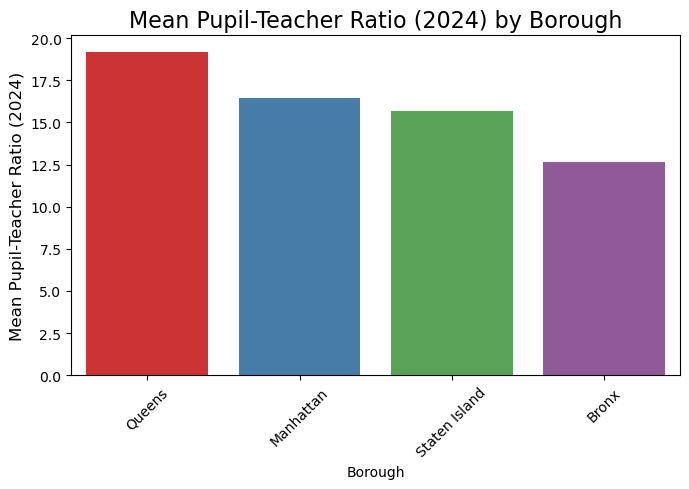

In [163]:
# Import downloaded web scraped data.
df = pd.read_csv('webscraped_data.csv')

# Define the mapping from County to Borough
county_to_borough = {
    'New York County': 'Manhattan',
    'Queens County': 'Queens',
    'Bronx County': 'Bronx',
    'Richmond County': 'Staten Island'
}

# Use replace() to map the values in the 'County' column and rename to 'Borough'
df['County'] = df['County'].replace(county_to_borough)
df = df.rename(columns={'County': 'Borough'})

# Group by 'Borough' and calculate the mean for Percent Free/Disc Lunch and Pupil-Teacher Ratio
df_mean = df.groupby('Borough').agg({
    'Percent Free/Disc Lunch (2024)': 'mean',
    'Pupil-Teacher Ratio (2024)': 'mean'
}).reset_index()

# Create the plots
# Bar plot for Percent Free/Disc Lunch by Borough (mean values)
plt.figure(figsize=(7, 5))
sns.barplot(x='Borough', y='Percent Free/Disc Lunch (2024)', data=df_mean.sort_values(by='Percent Free/Disc Lunch (2024)', ascending=False), 
            palette='Set1')
plt.title('Mean Percent Free/Disc Lunch (2024) by Borough', fontsize=16)
plt.ylabel('Mean Percent Free/Disc Lunch (2024)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

# Bar plot for Pupil-Teacher Ratio by Borough (mean values)
plt.figure(figsize=(7, 5))
sns.barplot(x='Borough', y='Pupil-Teacher Ratio (2024)', data=df_mean.sort_values(by='Pupil-Teacher Ratio (2024)', ascending=False),
            palette='Set1')
plt.title('Mean Pupil-Teacher Ratio (2024) by Borough', fontsize=16)
plt.ylabel('Mean Pupil-Teacher Ratio (2024)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Although based on a small sample size, and with no data for Brooklyn, the graphs depict a similar trend in Mean Pupil-Teacher Ratio across boroughs, ranging from 12.5 to 20 students per teacher in all schools. Surprisingly, Bronx has the lowest one, meaning that there's less students per teacher, therefore a more personalized experience for students. Although the sample size is very small, this data could be very valuable, and if in the future I decide to return to this project, I already know of a source where I can obtain quality data on this topic, for a fair price. As for the free lunch graph, we can observe that there is a big difference accross schools; this higher variance is likely due to the small sample size. Overall, the data shows that there is a high variance in this variable, as some schools give free/discounted lunch to 80% and some to only 30%, specially in the Manhattan.

### 3.4.1. Most Dangerous Boroughs in NYC with Community Schools.

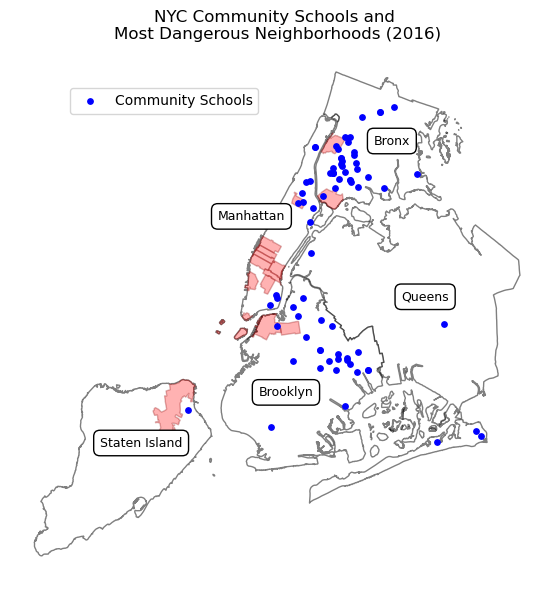

In [221]:
# Load and prepare school data
maps_data = demographics_2016.filter(['Community School?', 'Latitude', 'Longitude'])
maps_data["Coordinates"] = list(zip(maps_data['Longitude'], maps_data['Latitude']))
maps_data["Coordinates"] = maps_data["Coordinates"].apply(Point)
gdf_schools = gpd.GeoDataFrame(maps_data, geometry="Coordinates", crs="EPSG:4326")

# Load zip code boundaries (using your existing approach)
geojson_file = 'nyc-zip-code-tabulation-areas-polygons.geojson'
gdf_zips = gpd.read_file(geojson_file)
gdf_zips = gdf_zips.rename(columns={'postalCode': 'Zip Code'})
gdf_zips['Zip Code'] = gdf_zips['Zip Code'].astype(str)

# Prepare dangerous neighborhoods data
df_cleaned['Zip Code'] = df_cleaned['Zip Code'].astype(str)
dangerous_zips = df_cleaned['Zip Code'].unique()

# Filter zip codes to only dangerous ones
gdf_dangerous = gdf_zips[gdf_zips['Zip Code'].isin(dangerous_zips)]

# Load NYC borough boundaries
nyc_map = gpd.read_file(get_path('nybb'))
nyc_map = nyc_map.to_crs(epsg=4326)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot boroughs (base map)
nyc_map.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)

# Plot dangerous zip code areas (red)
gdf_dangerous.plot(ax=ax, color='red', alpha=0.3, edgecolor='darkred', label='Dangerous Neighborhoods')

# Plot community schools (blue dots)
community_schools = gdf_schools[gdf_schools['Community School?'] == 'Yes']
community_schools.plot(ax=ax, color='blue', markersize=15, label='Community Schools')

# Add borough labels (using your existing code)
for idx, row in nyc_map.iterrows():
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y
    
    if row['BoroName'] == 'Manhattan':
        offset_x, offset_y = -0.04, 0.01
    elif row['BoroName'] == 'Brooklyn':
        offset_x, offset_y = -0.02, -0.01
    elif row['BoroName'] == 'Queens':
        offset_x, offset_y = 0.01, 0.01
    elif row['BoroName'] == 'Bronx':
        offset_x, offset_y = 0.02, 0
    elif row['BoroName'] == 'Staten Island':
        offset_x, offset_y = 0.02, 0.01
    else:
        offset_x, offset_y = 0.01, 0.01
    
    ax.text(
        x + offset_x, y + offset_y, row['BoroName'], 
        fontsize=9, ha='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  # Rectangle behind the text
    )

# Clean up axes
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

# Title and legend
plt.title("NYC Community Schools and \nMost Dangerous Neighborhoods (2016)")
plt.legend(loc='center left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

plt.tight_layout()
plt.show()

The map reveals a significant overlap between NYC's community schools and high-risk neighborhoods. The concentration of community schools in these designated danger zones—particularly in the Bronx, Brooklyn, and northern Manhattan—suggests they serve students facing compounded challenges, including neighborhood violence that may disrupt learning and limit access to certain resources. This pattern underscores how environmental stressors, often due to economic factors, likely contribute to SAT performance gaps, and highlights the need to examine how neighborhood risk factors interact with students' academic outcomes. Only after understanding the students' context, can we propose policy changes that will truly make a difference.

## 3.5. Regression Trees

In [10]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

Regression Trees aim to split the data on different predictor variables at specific cutoff values. The regression tree objective function finds the cut-off value that minimizes the squared error between the predicted and actual values of y at each split, for each predictor variable j.

In this analysis, we aim to predict schools' Average Total SAT Scores (SAT) based on variables (x) like Economic Need Index (ENI), Racial Composition, or School Income Estimate funding, so the objective function is the following:
$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (SAT_i - \hat{SAT}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (SAT_i - \hat{SAT}_{R2})^2 \right]
$$

After the first split is made, the regression tree repeats the process for each of the two resulting groups, or nodes. This process continues recursively on each new branch, however we stop growing the tree when one of the following conditions is met: 1) The number of observations in a region is less than some chosen minimum leaf size or 2) The maximum depth of the tree is reached. These stopping criteria serve as regularization parameters to prevent the tree from growing too large and overfitting the data.

Pruning is another technique to prevent overfitting by removing unnecessary branches from the tree. 
The objective function for pruning is:

$$
\min_{tree \subset T} \sum (\hat{SAT}-SAT)^2 + \alpha|\text{terminal
   nodes in tree}|
$$

And it has two main goals.
1) Minimizing prediction error through the first term to achieve better predictions.  
2) Controlling tree complexity by penalizing the number of terminal nodes through the regularization parameter $ \alpha $. This controls how much we penalize tree complexity by adding to the error term. The higher $ \alpha $, the lower the risk of overfitting because we penalize additional branches more heavily. However, $ \alpha $ cannot be too high, because then the tree may fail to capture meaningful relationships — it will have very few nodes and become too simple, leading to underfitting.

We will start by running **Regression Tree 1** for the Preferred Specification obtained in **Section 2.3.1**:

$$
SAT\_Score = 1865.773 - 814.159 (ENI) - 90.479 (Majority\_Black)
$$

Mean Squared Error: 26442.90


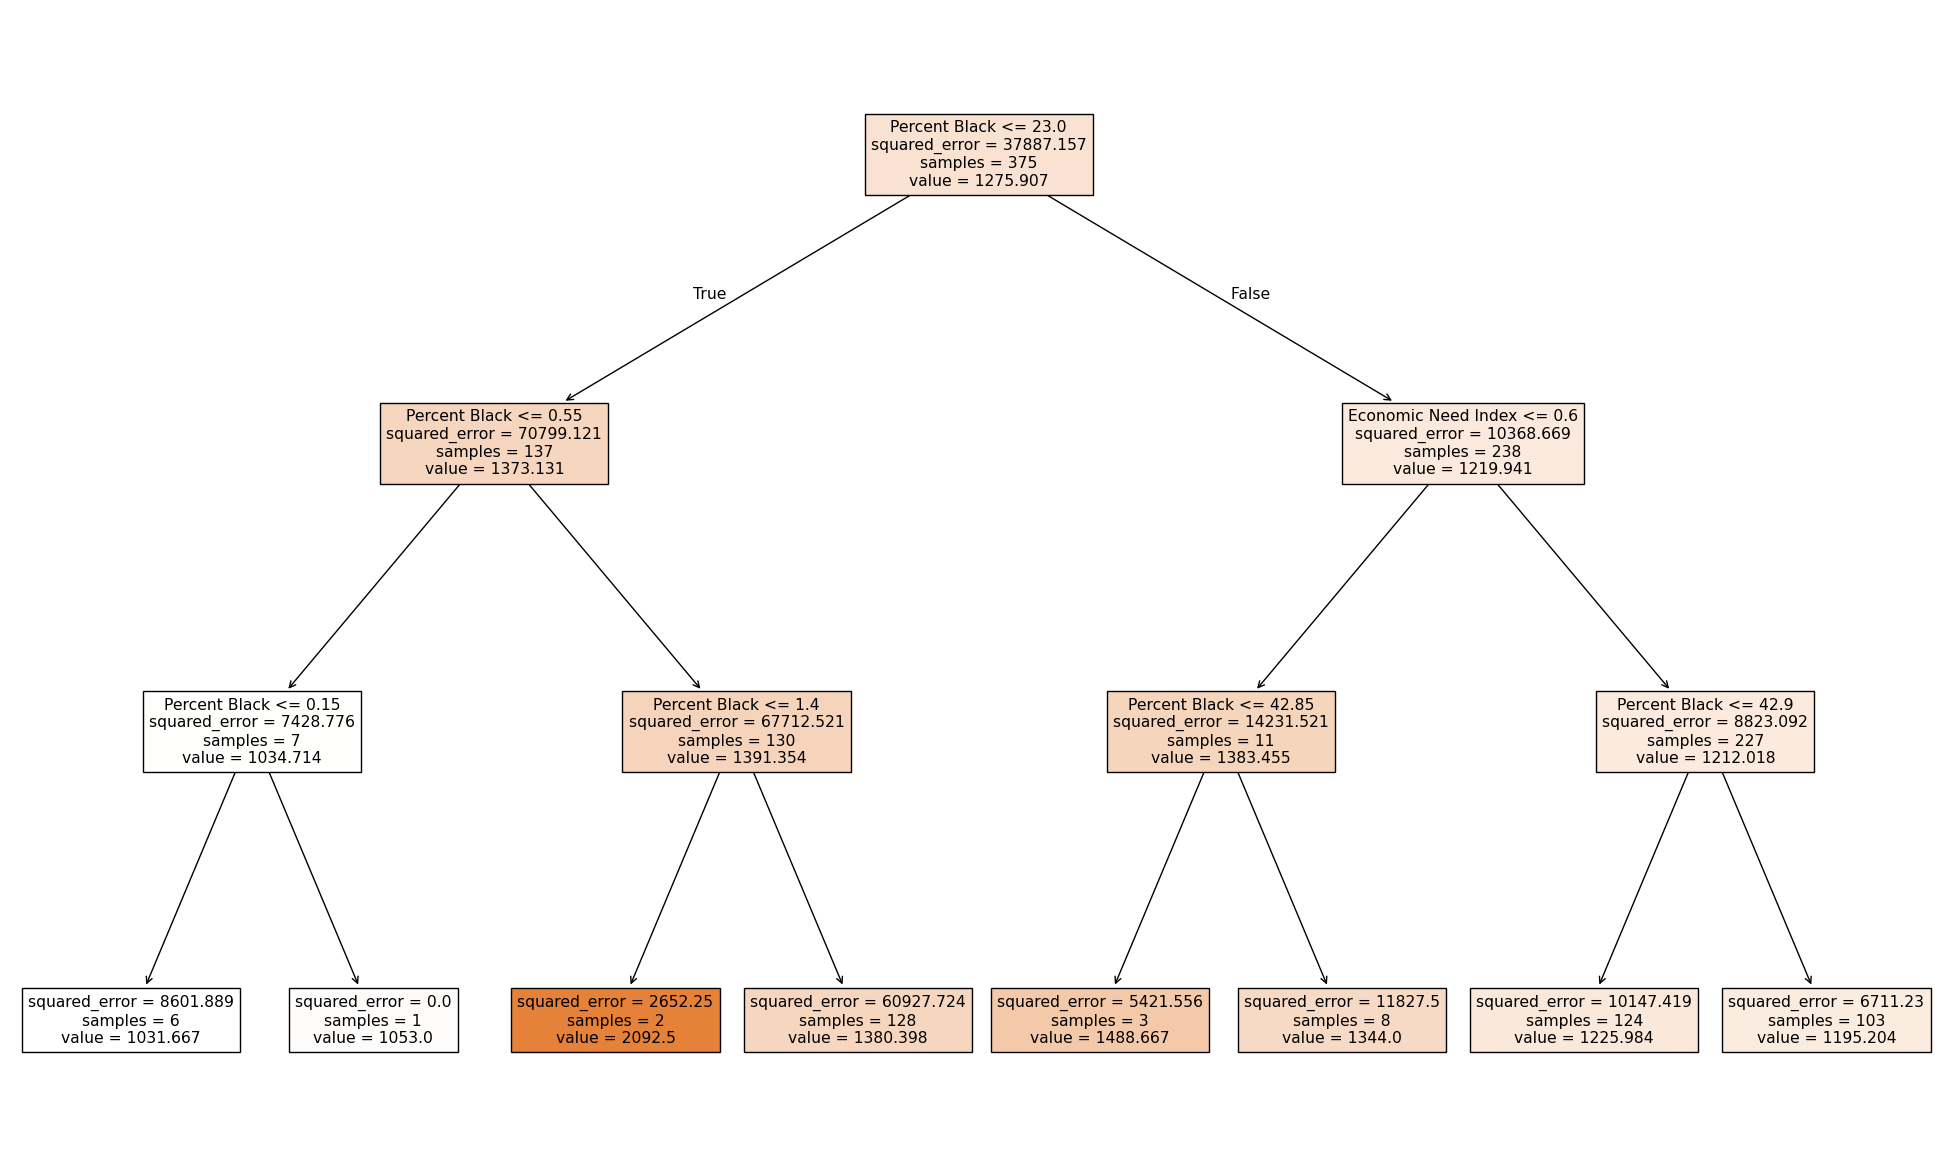

In [35]:
df = merged_data_2016

# Define independent (X) and dependent (y) variables
X = df[["Economic Need Index", "Percent Black"]]
y = df["Average Total SAT Score"]

# Train regression tree model
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Predict SAT scores
y_pred_tree = tree_model.predict(X)

# Calculate and print Mean Squared Error
mse_tree = mean_squared_error(y, y_pred_tree)
print(f"Mean Squared Error: {mse_tree:.2f}")

# Plot the regression tree
plt.figure(figsize=(25, 15))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.show()

**Regression Tree 1** tree predicts SAT scores using the percentage of Black students and Economic Need Index as predictors. The first split occurs at 23% Black students, indicating that this variable has the strongest influence on SAT scores. Schools with less than 23% Black students have a higher average predicted SAT score (1373.13), while those with more than 23% Black students tend to have lower scores (1219.9). In general, the tree shows that schools with a higher percentage of Black students tend to have lower SAT scores, and economic disadvantage further differentiates schools within this group. However, some nodes contain very few samples meaning their predictions may be less reliable, and the tree has a very high MSE and therefore doesn't do well when comparing predicted SAT Score values with actual values. 

Next we will run **Regression Tree 2** including all variables in the merged data set: Economic Need Index, School Income Estimate, Percent White, Percent Black, Percent Hispanic, Percent Asian and Percent of Students Chronically Absent and their effect on Average Total SAT Score.

Mean Squared Error (Full Model): 12814.06


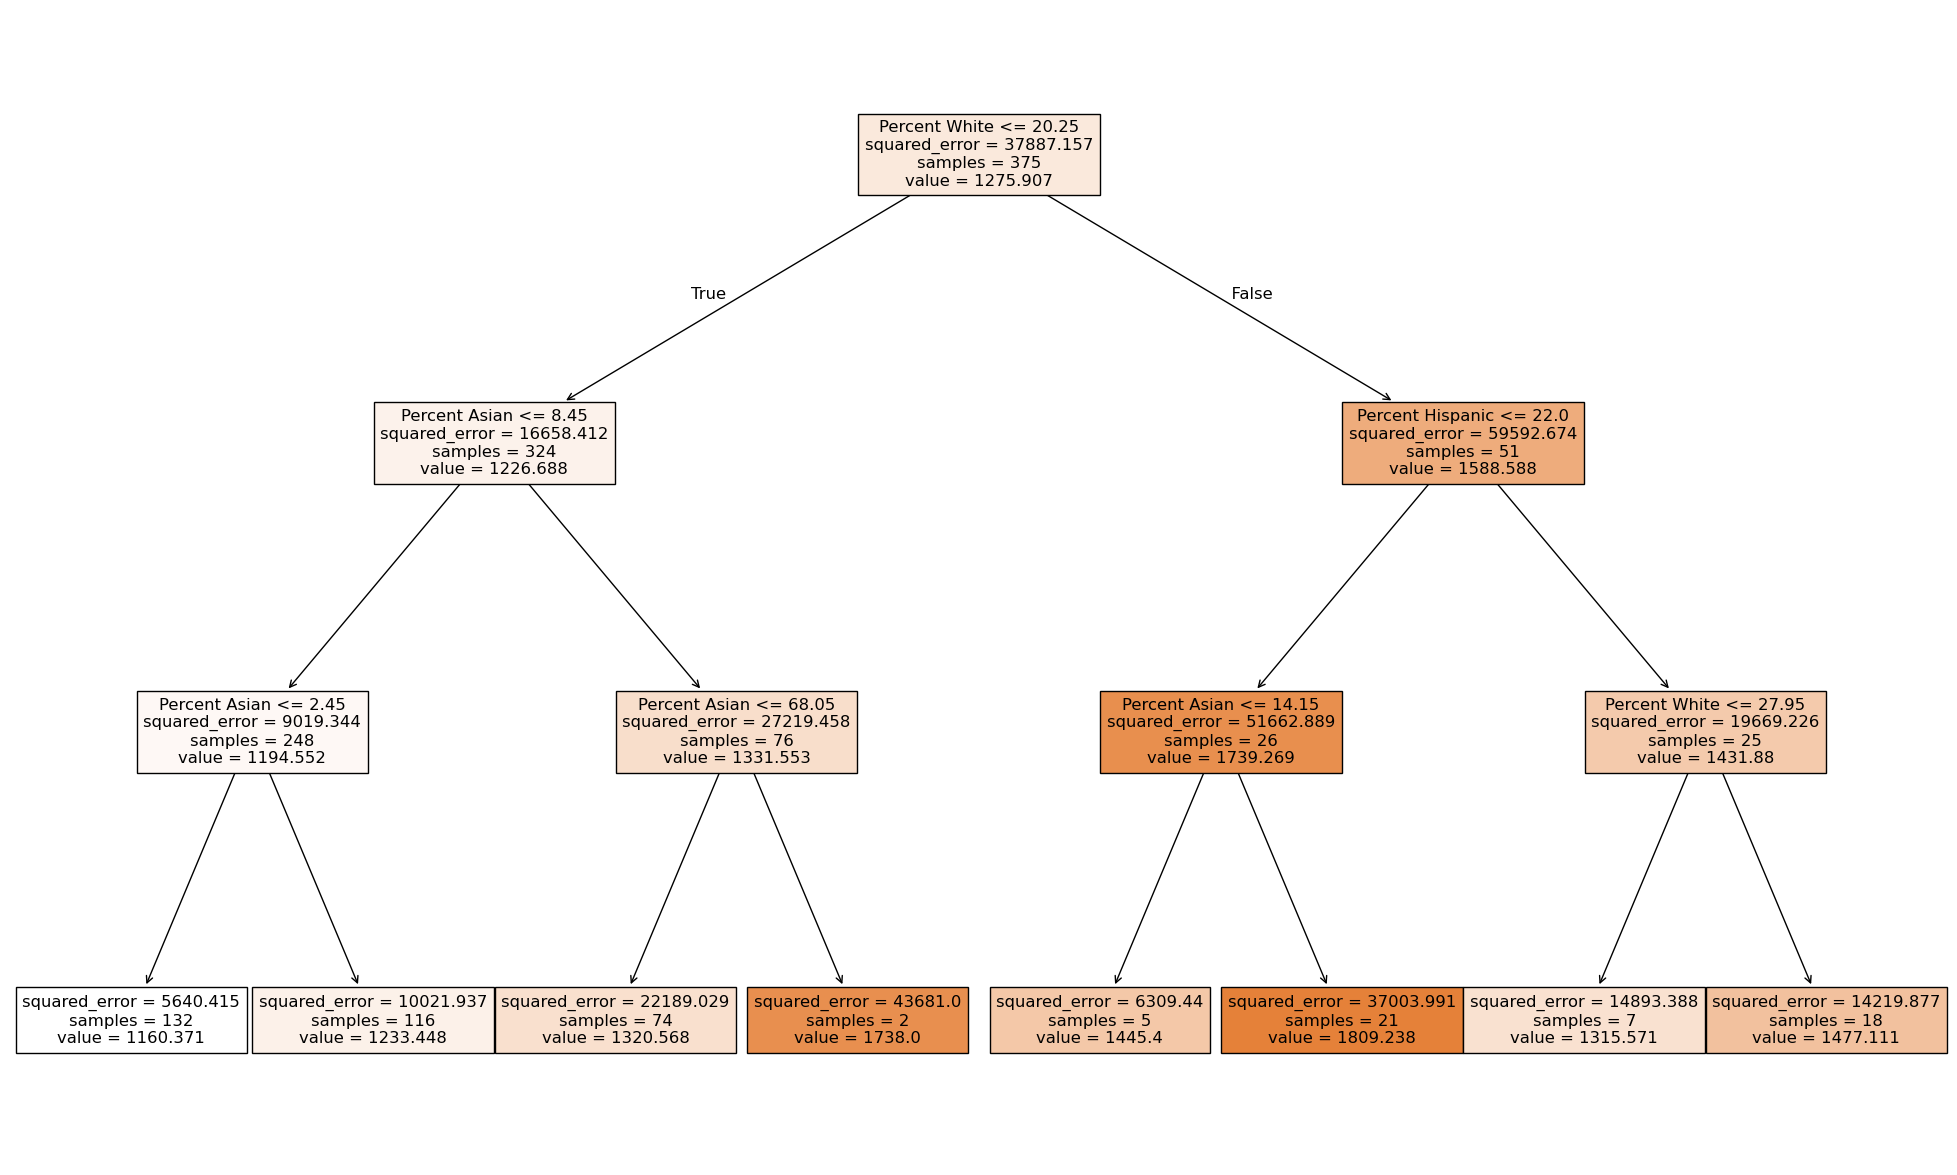

In [12]:
# Define independent (X) and dependent (y) variables
df = merged_data_2016.filter(['Economic Need Index', 'School Income Estimate', 'Percent White', 'Percent Black',
                             'Percent Hispanic', 'Percent Asian', 'Percent of Students Chronically Absent', 
                              'Average Total SAT Score'])
X_full = df.drop(columns=["Average Total SAT Score"])  # Exclude target variable
y = df["Average Total SAT Score"]

# Train regression tree model with all variables
tree_model_full = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model_full.fit(X_full, y)

# Predict SAT scores
y_pred_tree_full = tree_model_full.predict(X_full)

# Calculate and print Mean Squared Error
mse_tree_full = mean_squared_error(y, y_pred_tree_full)
print(f"Mean Squared Error (Full Model): {mse_tree_full:.2f}")

# Plot the full regression tree
plt.figure(figsize=(25, 15))
plot_tree(tree_model_full, feature_names=X_full.columns, filled=True)
plt.savefig("regression_tree_full.png", dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()

At first glance we observe that including all variables decreased the MSE by more than half, implying that it has a much better predicting power than the previous one based on our preferred specification. **Regression Tree 2** predicts SAT scores using the percentages of White, Asian, and Hispanic students. The root node splits on Percent White less than 20.25%, suggesting that schools with a lower percentage of White students generally have lower SAT scores (1226.7). For those schools, the next most influential factor is Percent Asian, with lower values associated with lower average SAT scores. In contrast, schools with more than 20.25% White students show a much higher predicted SAT score (1588.6), and their splits are driven primarily by Percent Hispanic and Percent Asian, both of which further differentiate performance. Notably, one of the highest predicted SAT scores in the tree (1809.2) appears in a group with high White and low Hispanic percentages, reinforcing patterns seen in educational outcome disparities. Overall, the tree reveals that schools with higher percentages of White and Asian students tend to have higher SAT scores, while those with lower percentages of these groups and higher Hispanic representation show lower predicted performance.

## 3.6. Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

Mean Squared Error (Random Forest): 2233.52


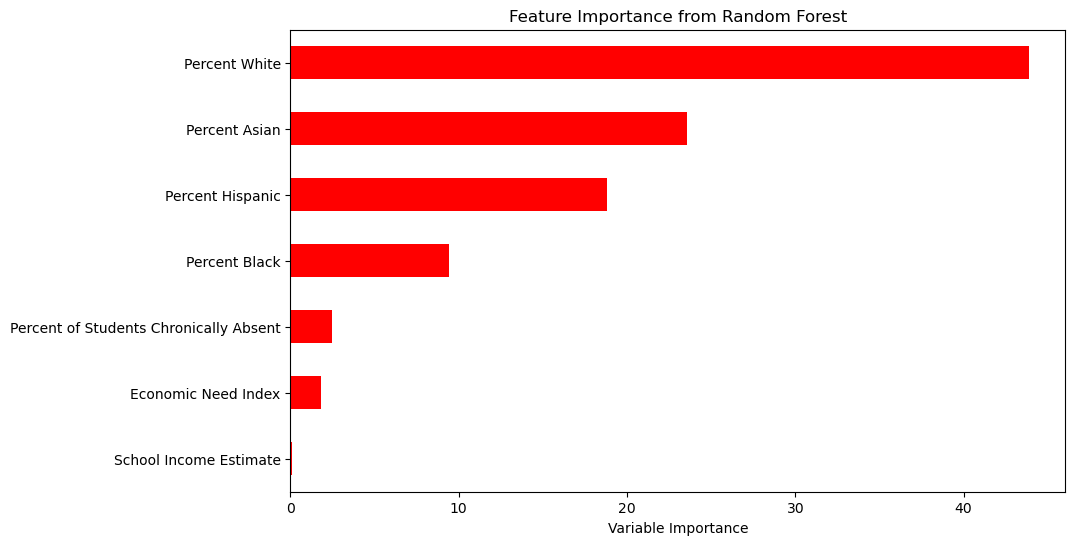

In [66]:
# Define independent (X) and dependent (y) variables
df = merged_data_2016.filter(['Economic Need Index', 'School Income Estimate', 'Percent White', 'Percent Black',
                             'Percent Hispanic', 'Percent Asian', 'Percent of Students Chronically Absent', 
                              'Average Total SAT Score'])
X = df.drop(columns=["Average Total SAT Score"])  # Exclude target variable
y = df["Average Total SAT Score"]

# Train the Random Forest model using 5 features (max_features=5)
regr_RF = RandomForestRegressor(max_features=5, random_state=1)
regr_RF.fit(X, y)

# Predict SAT scores
pred = regr_RF.predict(X)

# Calculate and print Mean Squared Error
mse_rf = mean_squared_error(y, pred)
print(f"Mean Squared Error (Random Forest): {mse_rf:.2f}")

# Feature Importance Matrix
importance = pd.DataFrame({'Importance': regr_RF.feature_importances_ * 100}, index=X.columns)
importance_sorted = importance.sort_values('Importance', axis=0, ascending=True)

# Plot the feature importance
importance_sorted.plot(kind='barh', color='r', figsize=(10, 6))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.title('Feature Importance from Random Forest')
plt.show()

This model includes all variables from the initial dataset: racial composition (percent White, Asian, Black, Hispanic), Chronic Absenteeism, Economic Need Index, and School Income Estimate. Despite including a wide range of predictors, the model yielded a relatively high Mean Squared Error (MSE) of 2233.52. Interestingly, the most important predictors were racial variables, particularly the percentage of White and Asian students, suggesting that race played a significant role in SAT score prediction.

Mean Squared Error (Random Forest): 1759.63


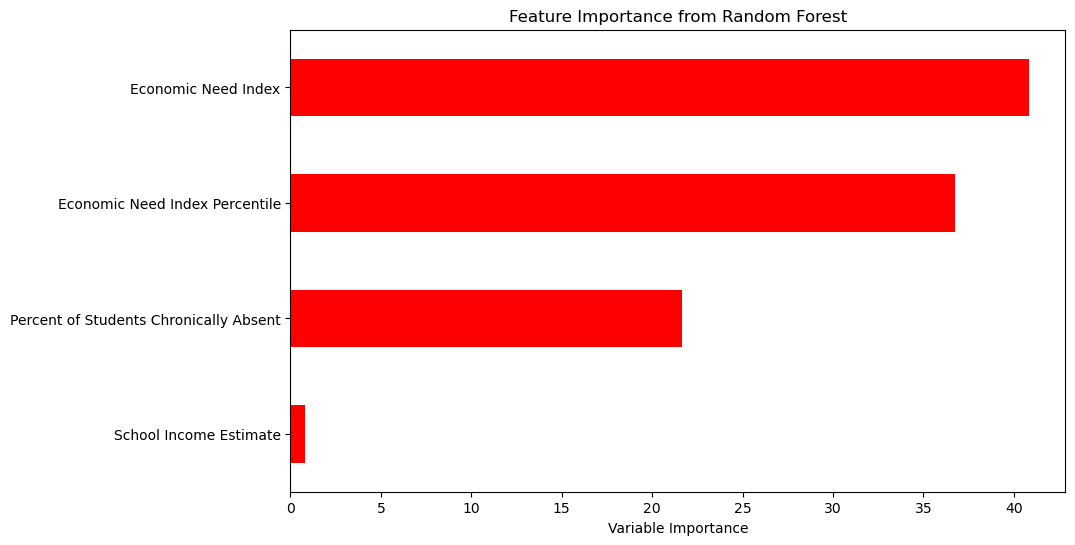

In [82]:
df = merged_new_variable.filter(['Economic Need Index', 'School Income Estimate',
                              'Percent of Students Chronically Absent', 
                              'Average Total SAT Score', 'Economic Need Index Percentile'])
X = df.drop(columns=["Average Total SAT Score"])  # Exclude target variable
y = df["Average Total SAT Score"]

# Train the Random Forest model using 5 features (max_features=5)
regr_RF = RandomForestRegressor(max_features=5, random_state=1)
regr_RF.fit(X, y)

# Predict SAT scores
pred = regr_RF.predict(X)

# Calculate and print Mean Squared Error
mse_rf = mean_squared_error(y, pred)
print(f"Mean Squared Error (Random Forest): {mse_rf:.2f}")

# Feature Importance Matrix
importance = pd.DataFrame({'Importance': regr_RF.feature_importances_ * 100}, index=X.columns)
importance_sorted = importance.sort_values('Importance', axis=0, ascending=True)

# Plot the feature importance
importance_sorted.plot(kind='barh', color='r', figsize=(10, 6))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.title('Feature Importance from Random Forest')
plt.show()

To explore whether socioeconomic indicators could substitute for race, this model excluded racial variables and included only the Economic Need Index, Schools Disadvantage Index, Economic Need Percentile here, Chronic Absenteeism Percent, and School Income Estimate. Surprisingly, the MSE dropped to 1759.63, indicating that these variables were potentially more informative when race was excluded and capture actual values much better on their own.

Mean Squared Error (Random Forest): 1463.50


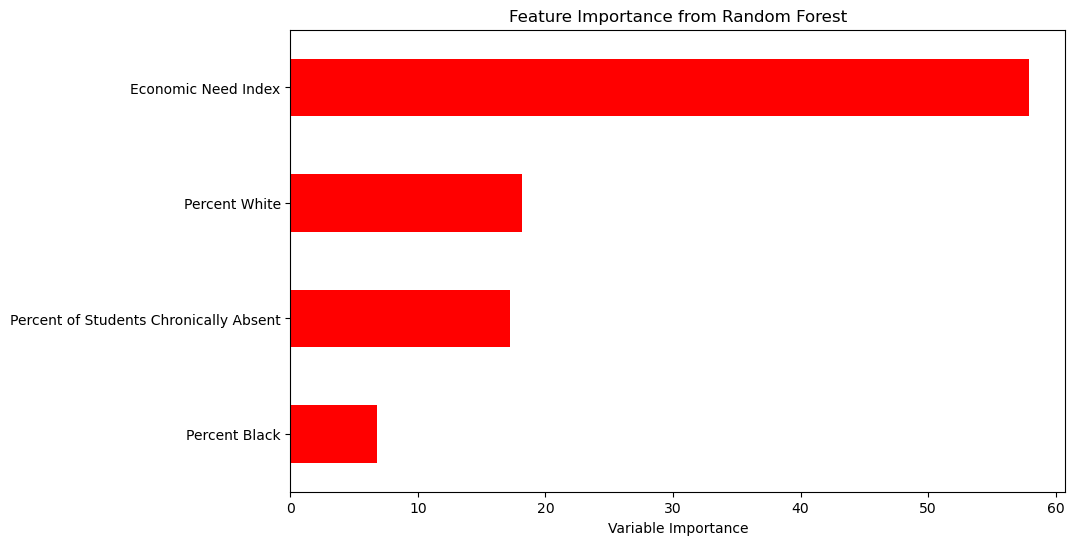

In [64]:
df = merged_new_variable.filter(['Percent of Students Chronically Absent', 
                              'Average Total SAT Score', 'Economic Need Index', 'Percent Black_x',
                                'Percent White_x']).rename(columns={'Percent Black_x': 'Percent Black', 
                                                                   'Percent White_x': 'Percent White'})
X = df.drop(columns=["Average Total SAT Score"])  # Exclude target variable
y = df["Average Total SAT Score"]

# Train the Random Forest model using 5 features (max_features=5)
regr_RF = RandomForestRegressor(max_features=5, random_state=1)
regr_RF.fit(X, y)

# Predict SAT scores
pred = regr_RF.predict(X)

# Calculate and print Mean Squared Error
mse_rf = mean_squared_error(y, pred)
print(f"Mean Squared Error (Random Forest): {mse_rf:.2f}")

# Feature Importance Matrix
importance = pd.DataFrame({'Importance': regr_RF.feature_importances_ * 100}, index=X.columns)
importance_sorted = importance.sort_values('Importance', axis=0, ascending=True)

# Plot the feature importance
importance_sorted.plot(kind='barh', color='r', figsize=(10, 6))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.title('Feature Importance from Random Forest')
plt.show()

Lastly, selected races (Black and White) and Economic Need Index were combined, along with  Percent of Students Chronically Absent in this last forest. With a further reduced MSE of 1463.50, this model struck a balance in including socioeconomic and racial factors, and achieved a better predictive accuracy, highlighting that a smaller, targeted set of features—especially race and economic need—could still capture much of the variation in SAT scores. For example, instead of including both Economic Need Index and Percentile Economic Need Index, which is the School Income Disadvantage created in 1.2.2, we included only one of these in the model, and discovered that it captures most important in predicting SAT Score.

Comparing across models, we observe that the model with the most variables (Model 1) performed the worst in terms of MSE, while the most streamlined model (Model 3) performed the best. This suggests that including too many predictors—particularly those that may overlap in the information they convey—can introduce noise rather than better accuracy. Additionally, while racial variables were initially the most important in the full model, removing them did not worsen model performance—in fact, it improved it, implying that socioeconomic indicators like the Economic Need Index may already capture much of the racial disparities embedded in SAT performance. Ultimately, the best-performing model (Model 3) shows the persistent influence of both race and economic inequality on educational outcomes.

## 3.7. OLS vs. ML

When comparing the linear regression with the regression tree, we observe interpretive contrasts, and running them both can reveal complementary insights. The OLS regression provides clear, statistically grounded estimates of how specific socioeconomic and racial factors—like the Economic Need Index and Majority Black—linearly affect SAT scores, allowing for interpretations such as "if Economic Need Index goes up by 1, SAT Scores decrease by...". This is a much more quantitative perspective of how one affects the other. However, its linear structure limits the ability to uncover complex, non-linear interactions between variables. In contrast, the regression tree excels at splitting the data into subgroups, revealing hierarchical and conditional relationships, like for example how schools with low Percent White and low Percent Asian populations exhibit notably lower SAT performance, mainly because they have high Percent Hispanic. This pattern was not as transparent in the OLS results. So, while the linear regression quantifies average effects across all schools, the regression tree highlights thresholds and combinations of demographic traits that provide richer intuition about the impact of race and socioeconomic factors on educational outcomes through a connection of the variables.

## 3.8. Conclusion.

The results of this study reinforce the idea that socioeconomic status—captured by the School Disadvantage Index—plays a significant role in shaping academic performance. Since community schools predominantly serve Black and Hispanic students and also students with higher Economic Need Index, we can conclude that these are the students that require the most assistance, not only due to their high Economic Need Index but also because their lower SAT scores may affect their future opportunities and life quality. Considering that low SAT scores might be due to the lower School Income Estimate of the school they attend, it is important that policy makers revisit the benefits of Community Schools. Addressing these disparities requires not only academic interventions but also broader socio economic reforms to ensure equitable access to quality education, like for example, ensuring all schools receive similar resources (to bridge the gap in School Income Estimate). High schools should also encourage students, mainly Black and Hispanic, to take the SAT, by offering support services to promote a college-going culture in all schools, and bridge the gap in percentage tested across mainly White/Asian schools and mainly Hispanic/Black schools.

The regression analysis further supports the presence of structural inequalities affecting SAT performance in NYC schools. The strong significance of the Economic Need Index confirms the impact of economic hardship on test scores, while the persistence of racial disparities, even after controlling for economic factors, suggests that broader systemic issues remain unresolved. The fact that Majority Black schools exhibit significantly lower SAT scores despite accounting for economic variables indicates that racial disparities in education go beyond income differences alone. Additionally, absenteeism emerged as a key factor influencing SAT scores, suggesting that student engagement and school attendance play a crucial role in academic success. These findings indicate that while economic support is essential, policies must also address racial inequities and student engagement through targeted interventions such as mentorship programs, culturally responsive teaching, and school attendance initiatives. Expanding the scope of support beyond Community Schools to include more high-need schools, particularly in Queens and Upper Manhattan, will be necessary to create a more equitable educational landscape and reduce the overall disparity in SAT performance citywide.

# 4. References

Dixon-Roman, E. J., Everson, H. T., & Mcardle, J. J. (2013). Race, Poverty and SAT Scores: Modeling the Influences of Family Income on Black and White High School Students’ SAT Performance. Teachers College Record: The Voice of Scholarship in Education, 115(4), 1–33. https://doi.org/10.1177/016146811311500406  

Everson, H. T., & Millsap, R. E. (2004). Beyond Individual Differences: Exploring School Effects on SAT Scores. Educational Psychologist, 39(3), 157–172. https://doi.org/10.1207/s15326985ep3903_2 

Geiser, S. (2015). THE GROWING CORRELATION BETWEEN RACE AND SAT SCORES: New Findings from California. UC Berkeley: Center for Studies in Higher Education. https://escholarship.org/uc/item/9gs5v3pv 

Hess, A. J. (2019, October 3). Rich students get better SAT scores—here’s why. CNBC. Retrieved from https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html 

Hoover, N. (2007). Cultural Disparities of SAT Scores and the Influence on Higher Education Opportunities for African American and Latino Students. Dominican University of California. https://doi.org/10.33015/dominican.edu/2007.edu.03

Hurwitz, M., Mbekeani, P. P., Nipson, M. M., & Page, L. C. (2017). Surprising Ripple Effects: How Changing the SAT Score-Sending Policy for Low-Income Students Impacts College Access and Success. Educational Evaluation and Policy Analysis, 39(1), 77-103. https://doi.org/10.3102/0162373716665198  

Krueger, Rothstein & Turner (2005). Race, Income and College in 25 Years: The Continuing Legacy of Segregation and Discrimination. NBER. Retrieved from https://www.nber.org/papers/w11445 

M. Liu, W. Lu and L. Zhao. (2024). Decoding SAT Scores: A Multifaceted Analysis of Socioeconomic and Educational Influences Across Diverse Regions. (2024). 2024 IEEE Integrated STEM Education Conference (ISEC), 1-2. https://doi-org.myaccess.library.utoronto.ca/10.1109/ISEC61299.2024.10665306 

Sackett, P. R., Kuncel, N. R., Beatty, A. S., Rigdon, J. L., Shen, W., & Kiger, T. B. (2012). The Role of Socioeconomic Status in SAT-Grade Relationships and in College Admissions Decisions. Psychological Science, 23(9), 1000-1007. https://doi.org/10.1177/0956797612438732 (Original work published 2012) 

Steelman, L. C., & Powell, B. (1985). Appraising the Implications of the SAT for Educational Policy. The Phi Delta Kappan, 66(9), 603–607. http://www.jstor.org/stable/20387452 

Thomas, M.K. (2004). Where College-Bound Students Send Their SAT Scores: Does Race Matter? Social Science Quarterly, 85(5), 1374-1389. https://onlinelibrary.wiley.com/doi/10.1111/j.0038-4941.2004.00281.x 

White G., Stepney C., Hatchimonji D., Moceri D., Linsky A., Reyes-Portillo J., Elias M. (2016). The increasing impact of socioeconomics and race on standardized academic test scores across elementary, middle, and high school. Am J Orthopsychiatry, 86(1), 10-23. doi: 10.1037/ort0000122

Zwick, R. (2014). DISENTANGLING THE ROLE OF HIGH SCHOOL GRADES, SAT® SCORES, AND SES IN PREDICTING COLLEGE ACHIEVEMENT. ETS Research Report Series, 2013(1), 1-20. https://doi.org/10.1002/j.2333-8504.2013.tb02316.x 

Zwick, R. & Greif, J. (2007). New Perspectives on the Correlation of SAT Scores, High School Grades, and Socioeconomic Factors. Journal of Educational Measurement, 44(1), 23-45. https://onlinelibrary.wiley.com/doi/full/10.1111/j.1745-3984.2007.00025.x 

Zwick, R. & Himelfarb, I. (2011). The Effect of High School Socioeconomic Status on the Predictive Validity of SAT Scores and High School Grade-Point Average. Journal of Educational Measurement, 48(2), 101-121. https://doi.org/10.1111/j.1745-3984.2011.00136.x

Data sets:
NYC Open Data. (2017). Average SAT scores for NYC public schools. Retrieved from https://www.kaggle.com/datasets/nycopendata/high-schools  
PASSNYC. (2018). Data Science for Good: PASSNYC. Retrieved from https://www.kaggle.com/datasets/passnyc/data-science-for-good 